In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools as iter
import scipy.optimize as opt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#2 files for the analysis
# file is about the population
file1 = 'total population.csv'
# this file is about the GDP
file2 = "GDP.csv"

In [2]:
def read(filename,format=1):
    """ Taking the csv format file and returning 2 data frame .First one is  original dataframe and second one is its transposed version.
    
    Parameters:
        filename: Filename of csv format.
    Returns:
        [DataFrame, DataFrame Transposed]: The original dataframe
        and its transposed version."""
        
    if format:
        df = pd.read_csv(filename, skiprows=3)
    else:
        df = pd.read_excel(filename, skiprows=3)
    
    df.drop(df.columns[[1, 2, 3]], axis=1, inplace=True)
    return df, df.transpose()


# reading the Total Population file where population is the original format and 
# populationT is the transposed format of orignal data frame
population, populationT = read(file1)
population

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,59291.0,59522.0,59471.0,...,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,NaN
1,Africa Eastern and Southern,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,153955516.0,158313235.0,162875171.0,...,567891875.0,583650827.0,600008150.0,616377331.0,632746296.0,649756874.0,667242712.0,685112705.0,702976832.0,NaN
2,Afghanistan,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,9783147.0,10010030.0,10247780.0,...,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,NaN
3,Africa Western and Central,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,110798486.0,113319950.0,115921723.0,...,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,NaN
4,Angola,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,5787044.0,5827503.0,5868203.0,...,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,1135000.0,1163000.0,...,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0,1786038.0,NaN
262,"Yemen, Rep.",5542459.0,5646668.0,5753386.0,5860197.0,5973803.0,6097298.0,6228430.0,6368014.0,6515904.0,...,26984002.0,27753304.0,28516545.0,29274002.0,30034389.0,30790513.0,31546691.0,32284046.0,32981641.0,NaN
263,South Africa,16520441.0,16989464.0,17503133.0,18042215.0,18603097.0,19187194.0,19789771.0,20410677.0,21050540.0,...,53873616.0,54729551.0,55876504.0,56422274.0,56641209.0,57339635.0,58087055.0,58801927.0,59392255.0,NaN
264,Zambia,3119430.0,3219451.0,3323427.0,3431381.0,3542764.0,3658024.0,3777680.0,3901288.0,4029173.0,...,15234976.0,15737793.0,16248230.0,16767761.0,17298054.0,17835893.0,18380477.0,18927715.0,19473125.0,NaN


In [3]:

#The selected years clustering analysis
year1 = '1991'
year2 = '2021'


# listing regional countries and outliers that may distort in data
interest_reg_list = ['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia', 'American Samoa',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas, The', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados',
       'Brunei Darussalam', 'Bhutan', 'Botswana', 'Canada', 'Switzerland',
       'Channel Islands', 'Chile', 'China', "Cote d'Ivoire", 'Cameroon',
       'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Cuba', 'Curacao', 'Cayman Islands', 'Cyprus', 'Czechia',
       'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria',
       'Ecuador', 'Egypt, Arab Rep.', 'Eritrea', 'Spain', 'Estonia',
       'Ethiopia', 'Finland', 'Fiji', 'France', 'Faroe Islands',
       'Micronesia, Fed. Sts.', 'Gabon', 'United Kingdom', 'Georgia',
       'Ghana', 'Gibraltar', 'Guinea', 'Gambia, The', 'Guinea-Bissau',
       'Equatorial Guinea', 'Greece', 'Grenada', 'Greenland', 'Guatemala',
       'Guam', 'Guyana', 'Hong Kong SAR, China', 'Honduras', 'Croatia',
       'Haiti', 'Hungary', 'Indonesia', 'Isle of Man', 'India', 'Ireland',
       'Iran, Islamic Rep.', 'Iraq', 'Iceland', 'Israel', 'Italy',
       'Jamaica', 'Jordan', 'Japan', 'Kazakhstan', 'Kenya',
       'Kyrgyz Republic', 'Cambodia', 'Kiribati', 'St. Kitts and Nevis',
       'Korea, Rep.', 'Kuwait', 'Lao PDR', 'Lebanon', 'Liberia', 'Libya',
       'St. Lucia', 'Liechtenstein', 'Sri Lanka', 'Lesotho', 'Lithuania',
       'Luxembourg', 'Latvia', 'Macao SAR, China',
       'St. Martin (French part)', 'Morocco', 'Monaco', 'Moldova',
       'Madagascar', 'Maldives', 'Mexico', 'Marshall Islands',
       'North Macedonia', 'Mali', 'Malta', 'Myanmar', 'Montenegro',
       'Mongolia', 'Northern Mariana Islands', 'Mozambique', 'Mauritania',
       'Mauritius', 'Malawi', 'Malaysia', 'Namibia', 'New Caledonia',
       'Niger', 'Nigeria', 'Nicaragua', 'Netherlands', 'Norway', 'Nepal',
       'Nauru', 'New Zealand', 'Oman', 'Pakistan', 'Panama', 'Peru',
       'Philippines', 'Palau', 'Papua New Guinea', 'Poland',
       'Puerto Rico', "Korea, Dem. People's Rep.", 'Portugal', 'Paraguay',
       'Qatar', 'Romania', 'Russian Federation', 'Rwanda', 'Saudi Arabia',
       'Sudan', 'Senegal', 'Singapore', 'Solomon Islands', 'Sierra Leone',
       'El Salvador', 'San Marino', 'Somalia', 'Serbia', 'South Sudan',
       'Sao Tome and Principe', 'Suriname', 'Slovak Republic', 'Slovenia',
       'Sweden', 'Eswatini', 'Sint Maarten (Dutch part)', 'Seychelles',
       'Syrian Arab Republic', 'Turks and Caicos Islands', 'Chad', 'Togo',
       'Thailand', 'Tajikistan', 'Turkmenistan', 'Timor-Leste', 'Tonga',
       'Trinidad and Tobago', 'Tunisia', 'Turkiye', 'Tuvalu', 'Tanzania',
       'Uganda', 'Ukraine', 'Uruguay', 'United States', 'Uzbekistan',
       'St. Vincent and the Grenadines', 'Venezuela, RB',
       'British Virgin Islands', 'Virgin Islands (U.S.)', 'Vietnam',
       'Vanuatu', 'Samoa', 'Kosovo', 'Yemen, Rep.', 'South Africa',
       'Zambia', 'Zimbabwe']
# extract the required data for the clustering and drop missing values
pop_cluster = population[population['Country Name'].isin(interest_reg_list)][['Country Name', year1, year2]].dropna()


<Figure size 896x672 with 0 Axes>

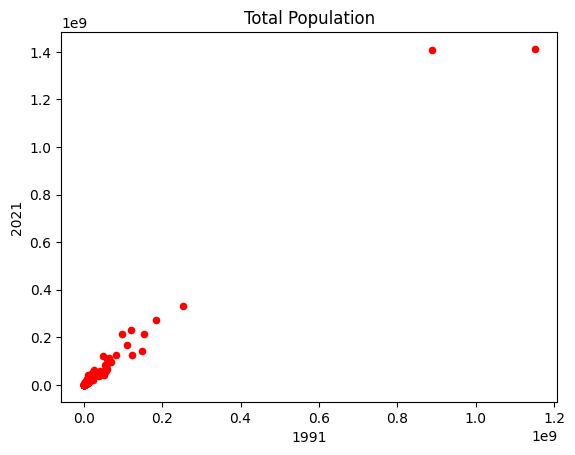

In [4]:
# visualising data
plt.figure(dpi=140)
pop_cluster.plot(year1, year2, kind='scatter', color='red')
plt.title('Total Population')
plt.show()

In [5]:
# convert the dataframe to an array
p = pop_cluster[[year1, year2]].values


In [6]:
max_value = p.max()
min_value = p.min()
# normalized data
scaled_data = (p - min_value) / (max_value - min_value)

print('\n Normalised Population:\n')



 Normalised Population:



In [7]:
sse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++',
                    max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

In [8]:
import warnings 
warnings.filterwarnings(action='ignore')

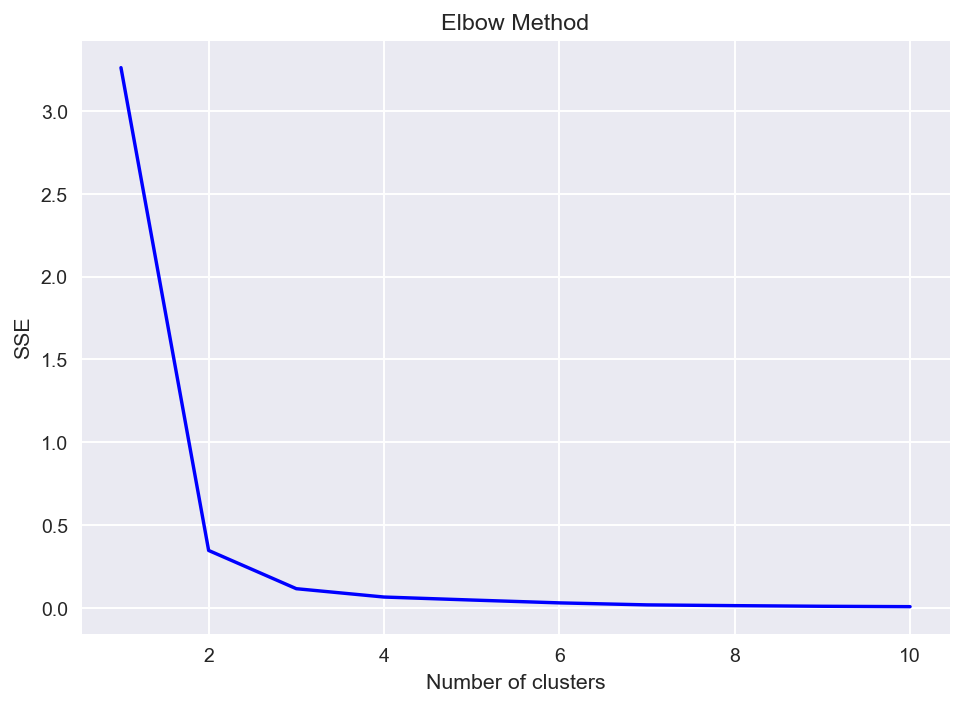

In [9]:
# plotting to check for appropriate number of clusters using elbow method
plt.style.use('seaborn')
plt.figure(dpi=140)
plt.plot(range(1, 11), sse, color='blue')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.savefig('clust.png')
plt.show()

In [10]:
# finding the Kmeans clusters
ncluster = 2
kmeans = KMeans(n_clusters=ncluster, init='k-means++', max_iter=300, n_init=10,
                random_state=0)

# Fit the model to the data
kmeans.fit(scaled_data)

# labels
labels = kmeans.labels_

In [11]:

# Use the silhouette score to evaluate the quality of the clusters
print(f'Silhouette Score: {silhouette_score(scaled_data, labels)}')
# Extracting clusters centers
cen = kmeans.cluster_centers_
print(cen)

Silhouette Score: 0.9734219632927816
[[0.01078268 0.01636333]
 [0.72209513 0.99830207]]


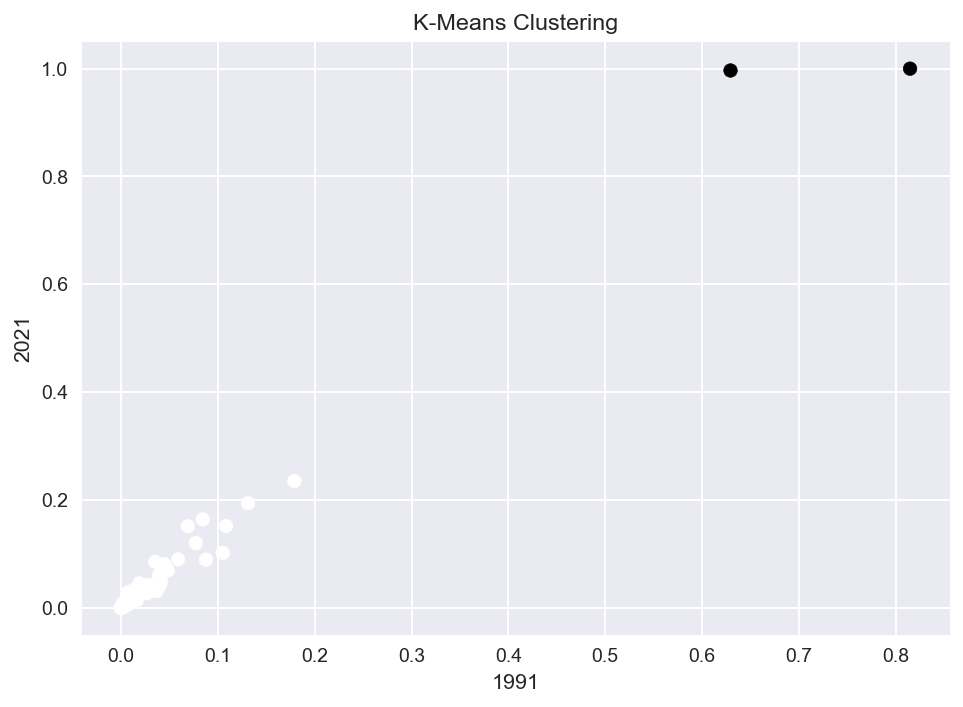

In [12]:
# Plot the scatter plot of the clusters
plt.style.use('seaborn')
plt.figure(dpi=140)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans.labels_)
plt.title('K-Means Clustering')
plt.xlabel('1991')
plt.ylabel('2021')
plt.show()

In [13]:
# Getting the Kmeans
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10,
                random_state=0)
y_predict = kmeans.fit_predict(scaled_data)
# print(y_predict)

In [14]:
# creating new dataframe with the labels for each country
pop_cluster['cluster'] = y_predict
pop_cluster.to_csv('cluster_results.csv')

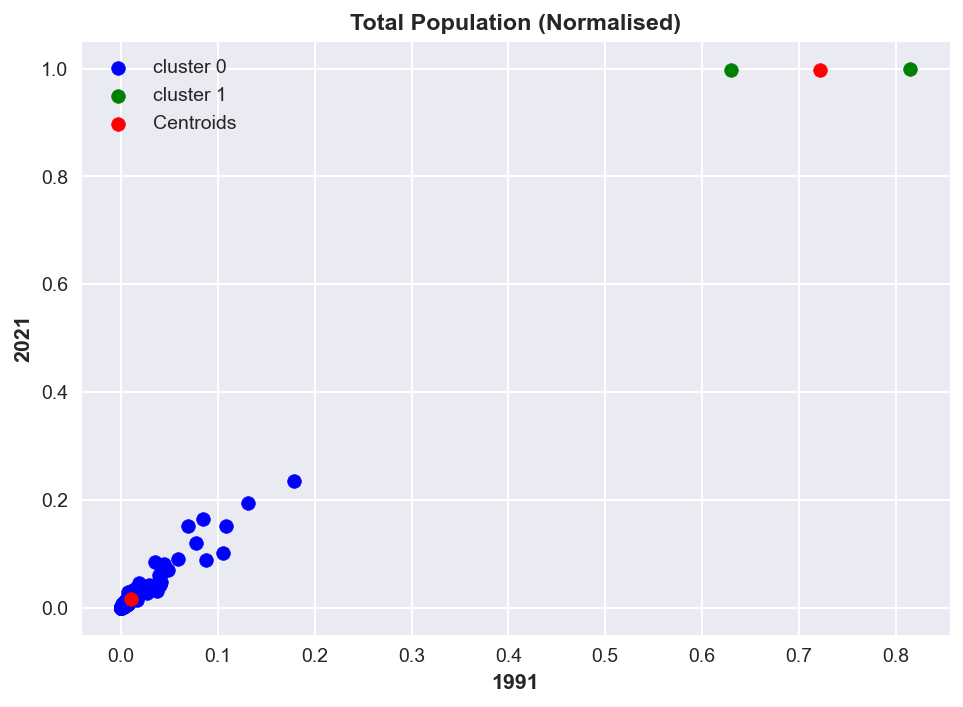

In [15]:

# plotting the normalised Population
plt.style.use('seaborn')
plt.figure(dpi=140)
plt.scatter(scaled_data[y_predict == 0, 0], scaled_data[y_predict ==
            0, 1], s=50, c='blue', label='cluster 0')
plt.scatter(scaled_data[y_predict == 1, 0], scaled_data[y_predict ==
            1, 1], s=50, c='green', label='cluster 1')
 
plt.scatter(cen[:, 0], cen[:, 1], s=50, c='red', label='Centroids')
plt.title('Total Population (Normalised)', fontweight='bold')
plt.xlabel('1991', fontweight='bold')
plt.ylabel('2021', fontweight='bold')
plt.legend()
plt.show()

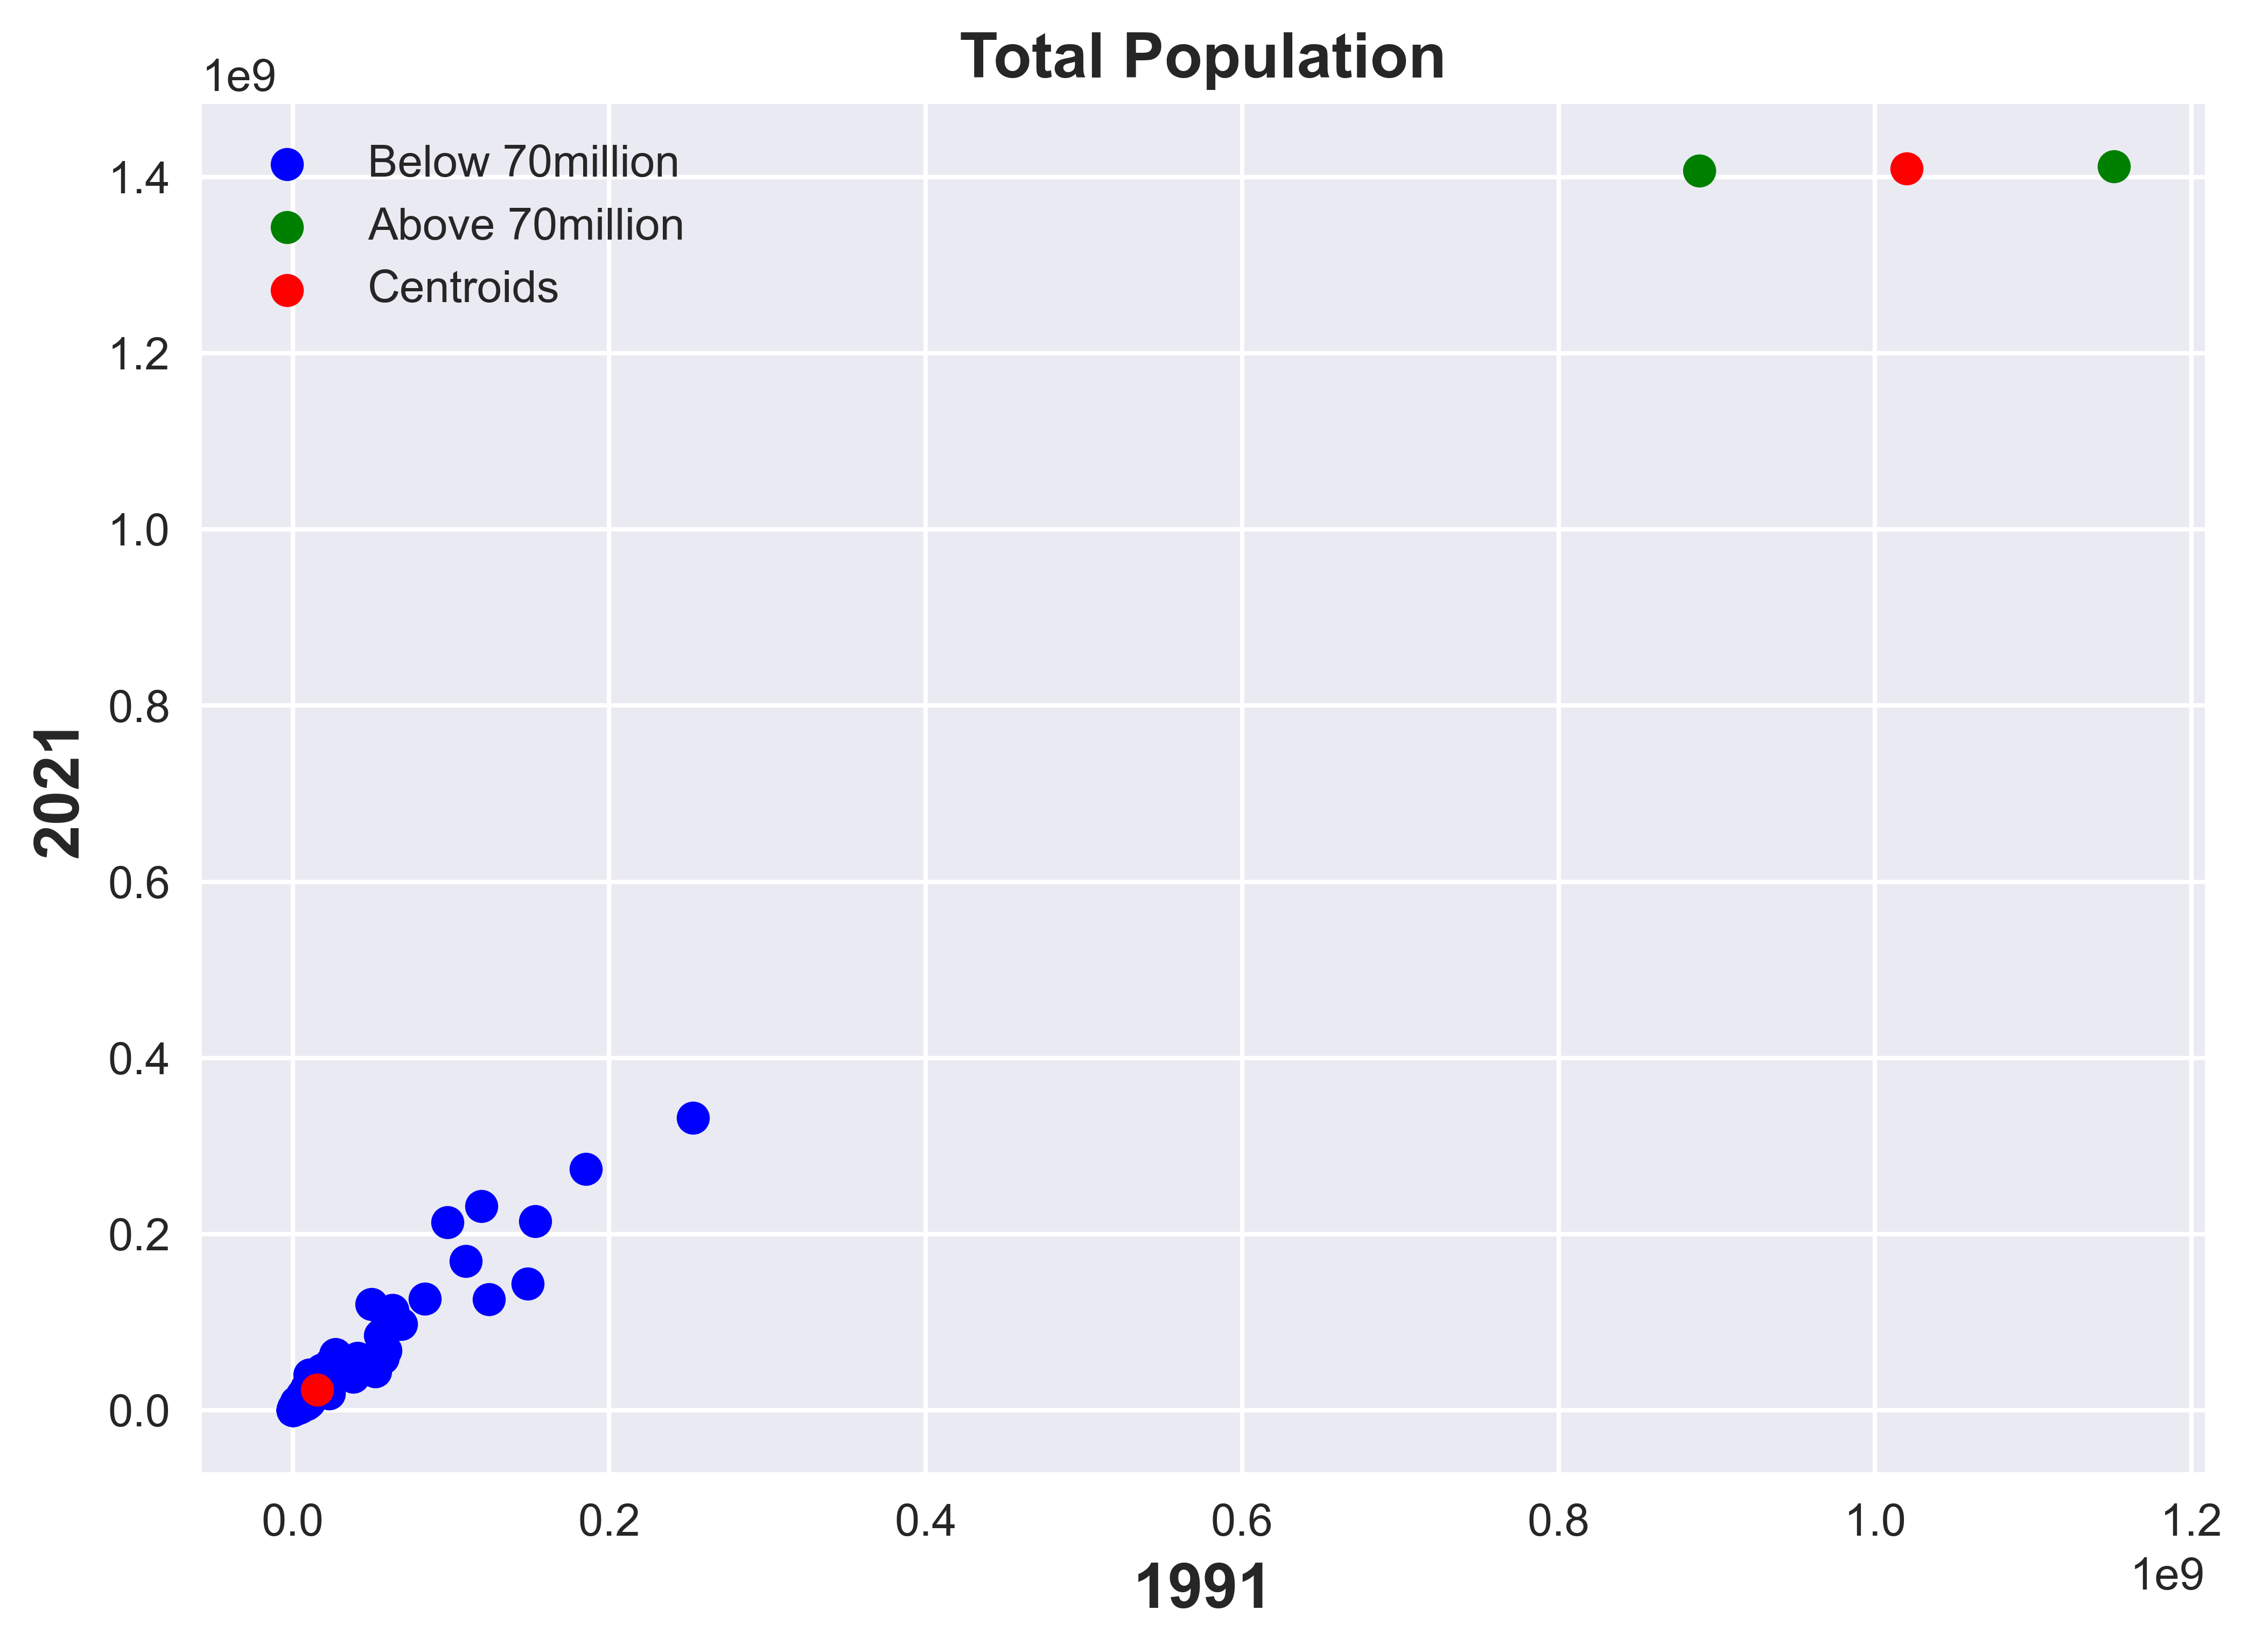

In [16]:
# converting centroid to it's unnormalized form
cent = cen * (max_value - min_value) + min_value

# plotting the Population in their clusters with the centroid points
plt.style.use('seaborn')
plt.figure(dpi=600)
plt.scatter(p[y_predict == 0, 0], p[y_predict == 0, 1],
            s=50, c='blue', label='Below 70million')
plt.scatter(p[y_predict == 1, 0], p[y_predict == 1, 1],
            s=50, c='green', label='Above 70million')
# plt.scatter(p[y_predict == 2, 0], p[y_predict == 2, 1],
#             s=50, c='violet', label='Below 98million')
plt.scatter(cent[:, 0], cent[:, 1], s=50, c='red', label='Centroids')
plt.title('Total Population', fontweight='bold', fontsize=14)
plt.xlabel('1991', fontweight='bold', fontsize=14)
plt.ylabel('2021', fontweight='bold', fontsize=14)
plt.legend()
plt.show()

In [17]:
#Curve Fitting Solutions

# reading the Total population file from the world bank format
population2, population2 = read(file1)
population2.head(2)

,0,1,2,3,4,5,6,7,8,9,...,256,257,258,259,260,261,262,263,264,265
Country Name,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
1960,54608.0,130692579.0,8622466.0,97256290.0,5357195.0,1608800.0,9443.0,93359407.0,133426.0,20349744.0,...,32500.0,32718461.0,64608.0,3031564839.0,113335.0,947000.0,5542459.0,16520441.0,3119430.0,3806310.0


In [18]:
# rename the the transposed data columns for population
df2 = population2.rename(columns=population2.iloc[0])
# drop the country name
df2 = df2.drop(index=df2.index[0], axis=0)
df2['Year'] = df2.index
df2

,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe,Year
1960,54608.0,130692579.0,8622466.0,97256290.0,5357195.0,1608800.0,9443.0,93359407.0,133426.0,20349744.0,...,32718461.0,64608.0,3031564839.0,113335.0,947000.0,5542459.0,16520441.0,3119430.0,3806310.0,1960
1961,55811.0,134169237.0,8790140.0,99314028.0,5441333.0,1659800.0,10216.0,95760348.0,140984.0,20680653.0,...,33621982.0,66462.0,3072510552.0,116820.0,966000.0,5646668.0,16989464.0,3219451.0,3925952.0,1961
1962,56682.0,137835590.0,8969047.0,101445032.0,5521400.0,1711319.0,11014.0,98268683.0,148877.0,21020359.0,...,34533889.0,68391.0,3126934725.0,120163.0,994000.0,5753386.0,17503133.0,3323427.0,4049778.0,1962
1963,57475.0,141630546.0,9157465.0,103667517.0,5599827.0,1762621.0,11839.0,100892507.0,157006.0,21364017.0,...,35526727.0,70400.0,3193508879.0,123416.0,1022000.0,5860197.0,18042215.0,3431381.0,4177931.0,1963
1964,58178.0,145605995.0,9355514.0,105959979.0,5673199.0,1814135.0,12690.0,103618568.0,165305.0,21708487.0,...,36509166.0,72493.0,3260517816.0,126582.0,1050000.0,5973803.0,18603097.0,3542764.0,4310332.0,1964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,105962.0,649756874.0,36686784.0,442646825.0,31273533.0,2866376.0,75013.0,432545676.0,9140169.0,44494502.0,...,94914330.0,297298.0,7661776338.0,209701.0,1797085.0,30790513.0,57339635.0,17835893.0,15052184.0,2018
2019,106442.0,667242712.0,37769499.0,454306063.0,32353588.0,2854191.0,76343.0,441467739.0,9211657.0,44938712.0,...,95776716.0,304404.0,7742681934.0,211905.0,1788878.0,31546691.0,58087055.0,18380477.0,15354608.0,2019
2020,106585.0,685112705.0,38972230.0,466189102.0,33428486.0,2837849.0,77700.0,449228296.0,9287289.0,45376763.0,...,96648685.0,311685.0,7820981524.0,214929.0,1790133.0,32284046.0,58801927.0,18927715.0,15669666.0,2020
2021,106537.0,702976832.0,40099462.0,478185907.0,34503774.0,2811666.0,79034.0,456520777.0,9365145.0,45808747.0,...,97468029.0,319137.0,7888408686.0,218764.0,1786038.0,32981641.0,59392255.0,19473125.0,15993524.0,2021


In [36]:

# # fitting the for China's population data
china = df2[['Year', 'China']].apply(pd.to_numeric,
                              errors='coerce')
df_china=china.dropna()
df_china.head(200)

,Year,Afghanistan
1960,1960.0,8622466.0
1961,1961.0,8790140.0
1962,1962.0,8969047.0
1963,1963.0,9157465.0
1964,1964.0,9355514.0
...,...,...
2017,2017.0,35643418.0
2018,2018.0,36686784.0
2019,2019.0,37769499.0
2020,2020.0,38972230.0


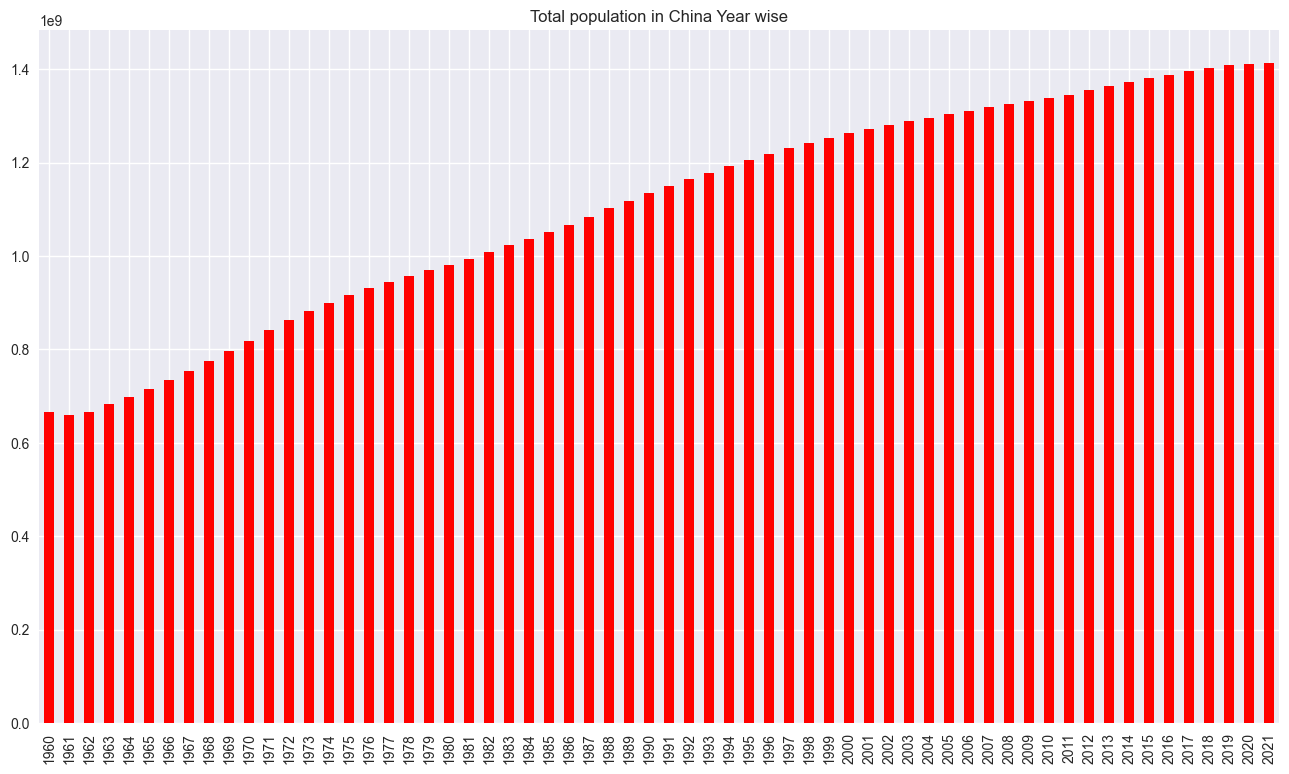

In [20]:
plt.figure(figsize=(16,9))
df_china['China'].plot(
 kind = 'bar' ,
 color = 'red'
 )
plt.title('Total population in China Year wise')
plt.show()

In [37]:

# Using the Logistic function for curve fitting and forecasting the Total Population
def logistic_func(current_t, initial_pop, growth_rate, inflection_point):
    """ Calculating the logistic growth of a population of different coutries.
    Parameters:
        current_t: The current time.
        initial_pop: The initial population.
        growth_rate: The growth rate.
        inflection_point: The inflection point.
        
    Returns:
       The population at the given time
    and growth rate g"""
    
    f = initial_pop / (1 + np.exp(-growth_rate*(current_t - inflection_point)))
    return f

# Doing Error ranges calculation
def err_ranges(inp_value, func, param, sigma):
    """
    Calculates the error ranges for a given function and its parameters.
    
    Parameters:
        inp_value : The input value for the function.
        func: The function for which the error ranges will be calculated.
        param: The parameters for the function.
        sigma: The standard deviation of the data.
        
    Returns:
         The lower and upper error ranges.
    """
    # Upper and Lower limits
    lower = func(inp_value, *param)
    upper = lower
    
#     Preparing  upper and lower limits for parameters by creating the list of tuples 
    up_low = []
    for p, s in zip(param, sigma):
        p_min = p - s
        p_max = p + s
        up_low.append((p_min, p_max))

    p_mix = list(iter.product(*up_low))

    # calculate the upper and lower limits
    for p in p_mix:
        y = func(inp_value, *p)
        lower = np.minimum(lower, y)
        upper = np.maximum(upper, y)

    return lower, upper


# fits the logistic data
param_ch, covar_ch = opt.curve_fit(logistic_func, df_china['Year'], df_china['China'],
                                   p0=(3e12, 0.03, 2041))


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

In [22]:

# calculating the standard deviation
sigma_ch = np.sqrt(np.diag(covar_ch))

# creating a new column with the fit data
df_china['fit'] = logistic_func(df_china['Year'], *param_ch)

# Forecast for the next 20 years
year = np.arange(1960, 2041)
forecast = logistic_func(year, *param_ch)

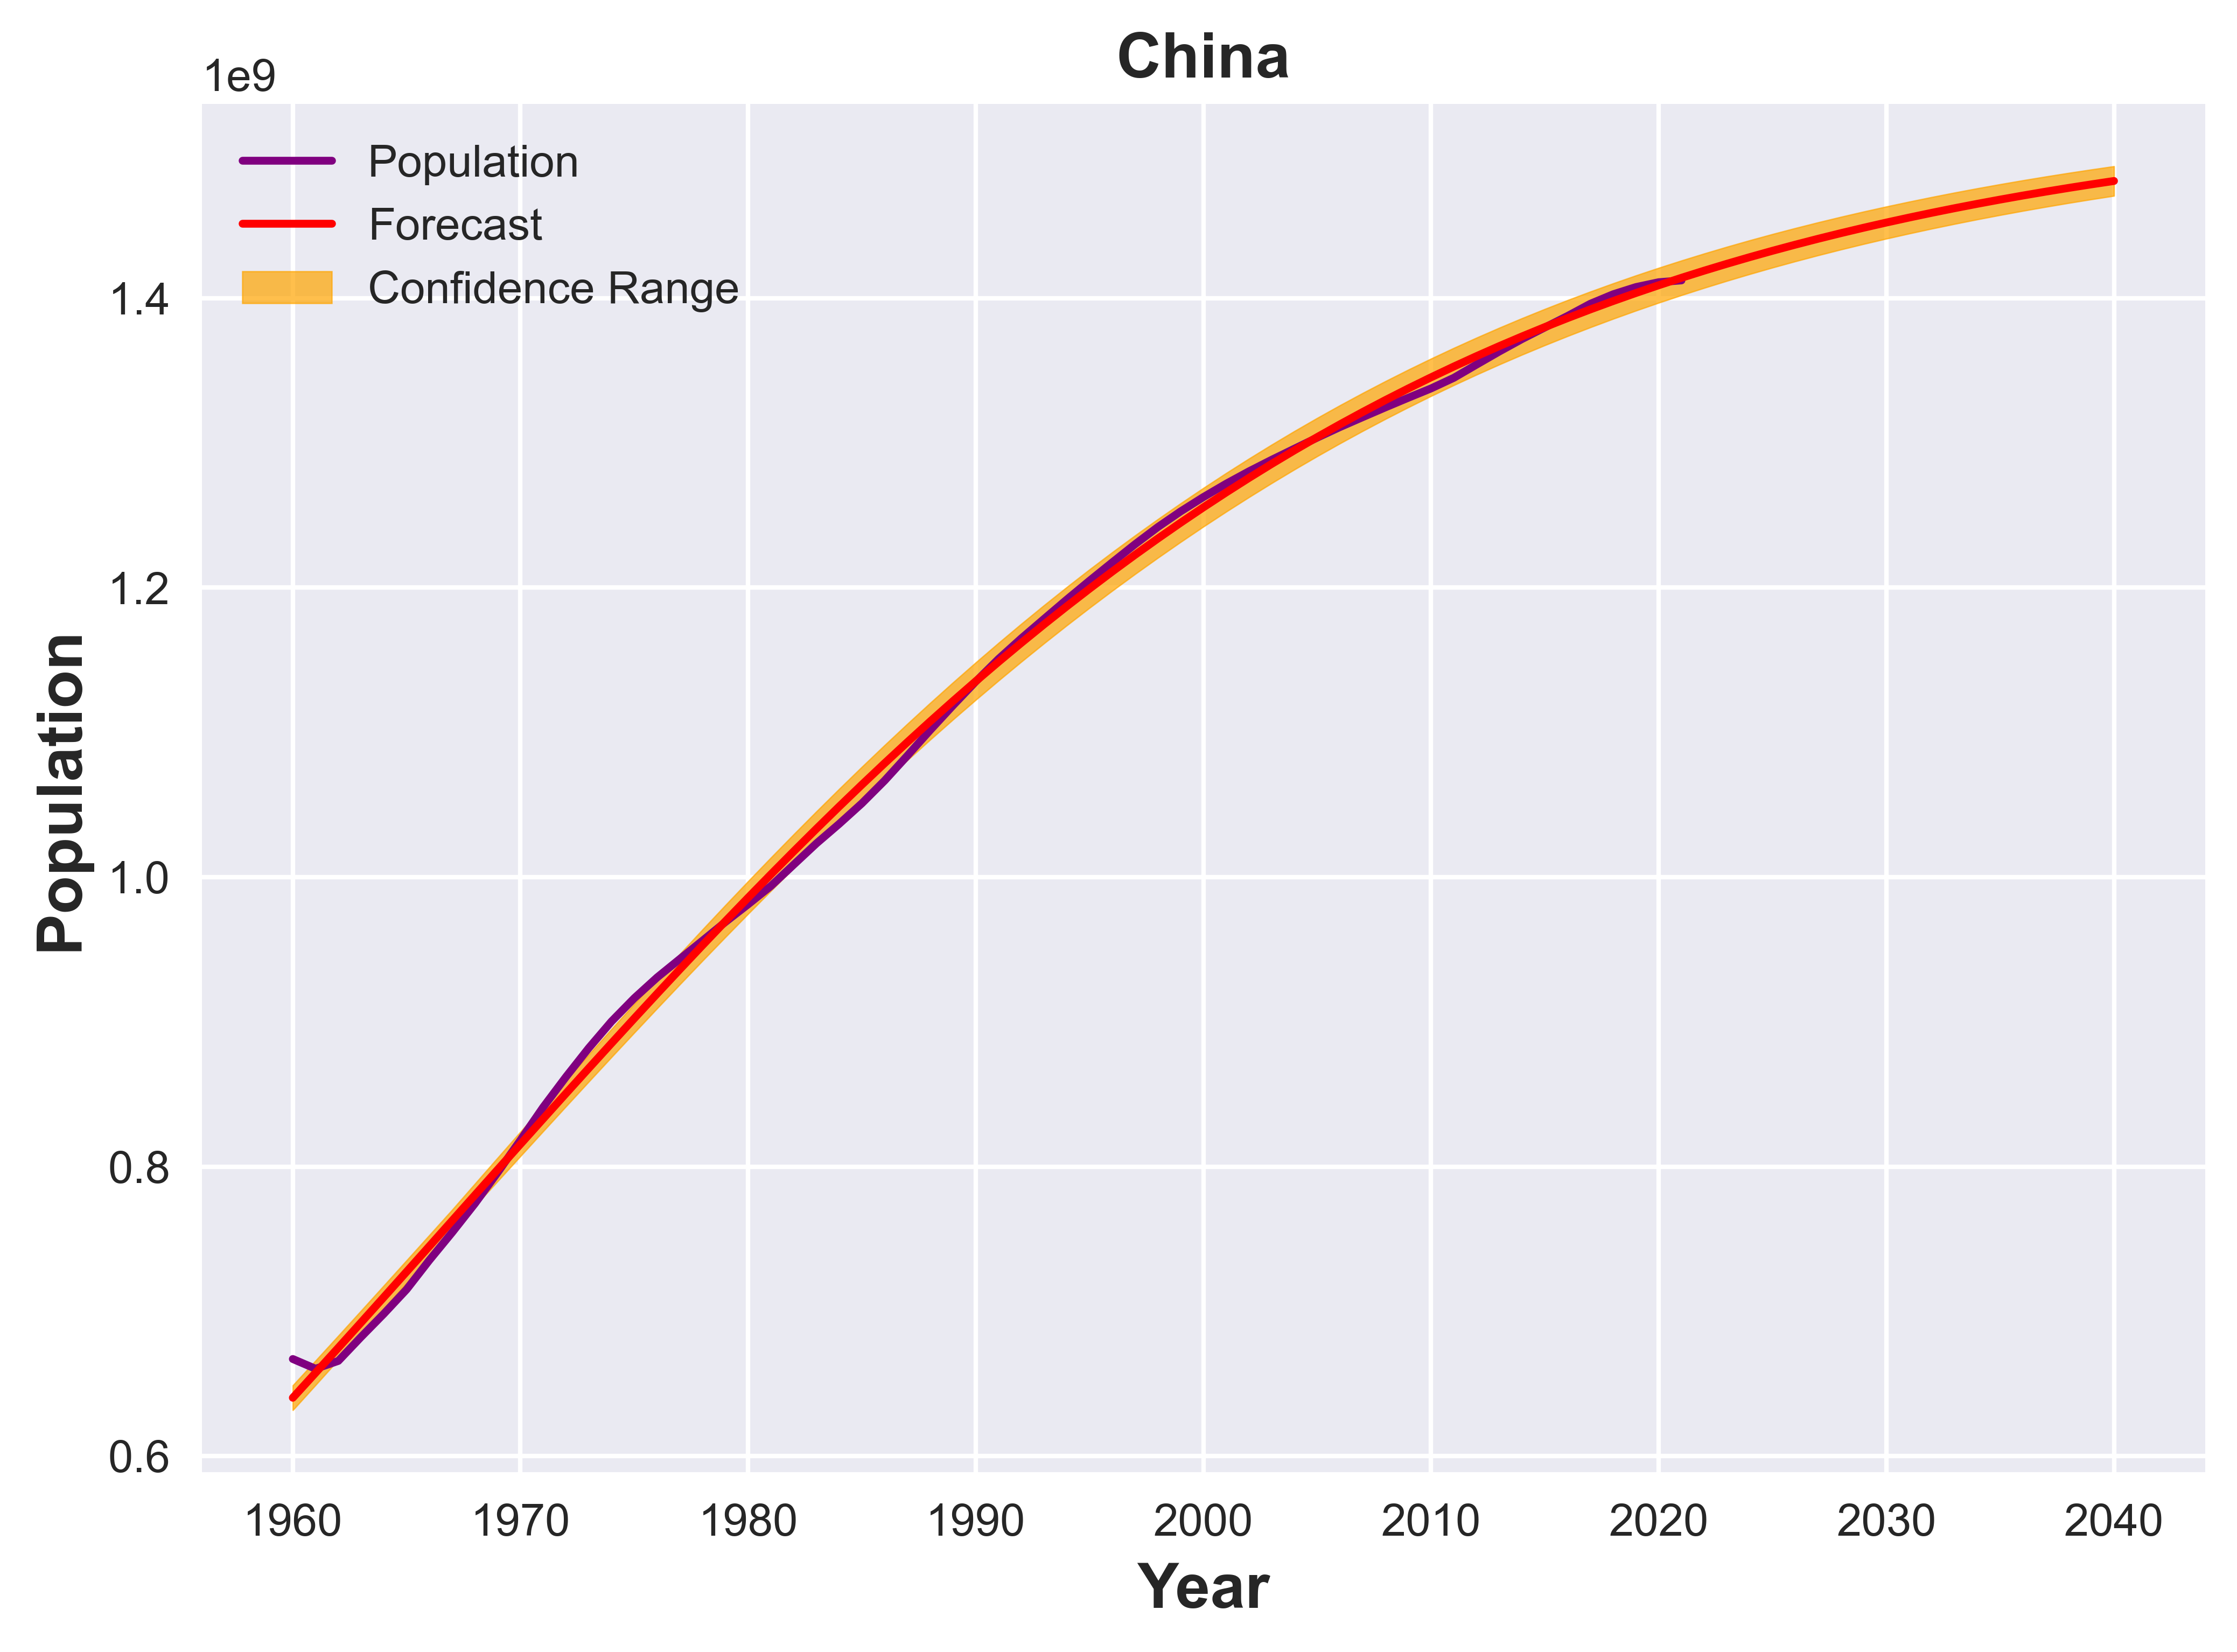

In [23]:

# calculates the error ranges
low_ch, up_ch = err_ranges(year, logistic_func, param_ch, sigma_ch)

# plotting China's Total Population
plt.style.use('seaborn')
plt.figure(dpi=600)
plt.plot(df_china["Year"], df_china["China"],
         label="Population", c='purple')
plt.plot(year, forecast, label="Forecast", c='red')
plt.fill_between(year, low_ch, up_ch, color="orange",
                 alpha=0.7, label='Confidence Range')
plt.xlabel("Year", fontweight='bold', fontsize=14)
plt.ylabel("Population",fontweight='bold', fontsize=14)
plt.legend()
plt.title('China', fontweight='bold', fontsize=14)
plt.show()

In [24]:
# prints the error ranges
print(err_ranges(2041, logistic_func, param_ch, sigma_ch))

(1473139980.0190356, 1493377760.180101)


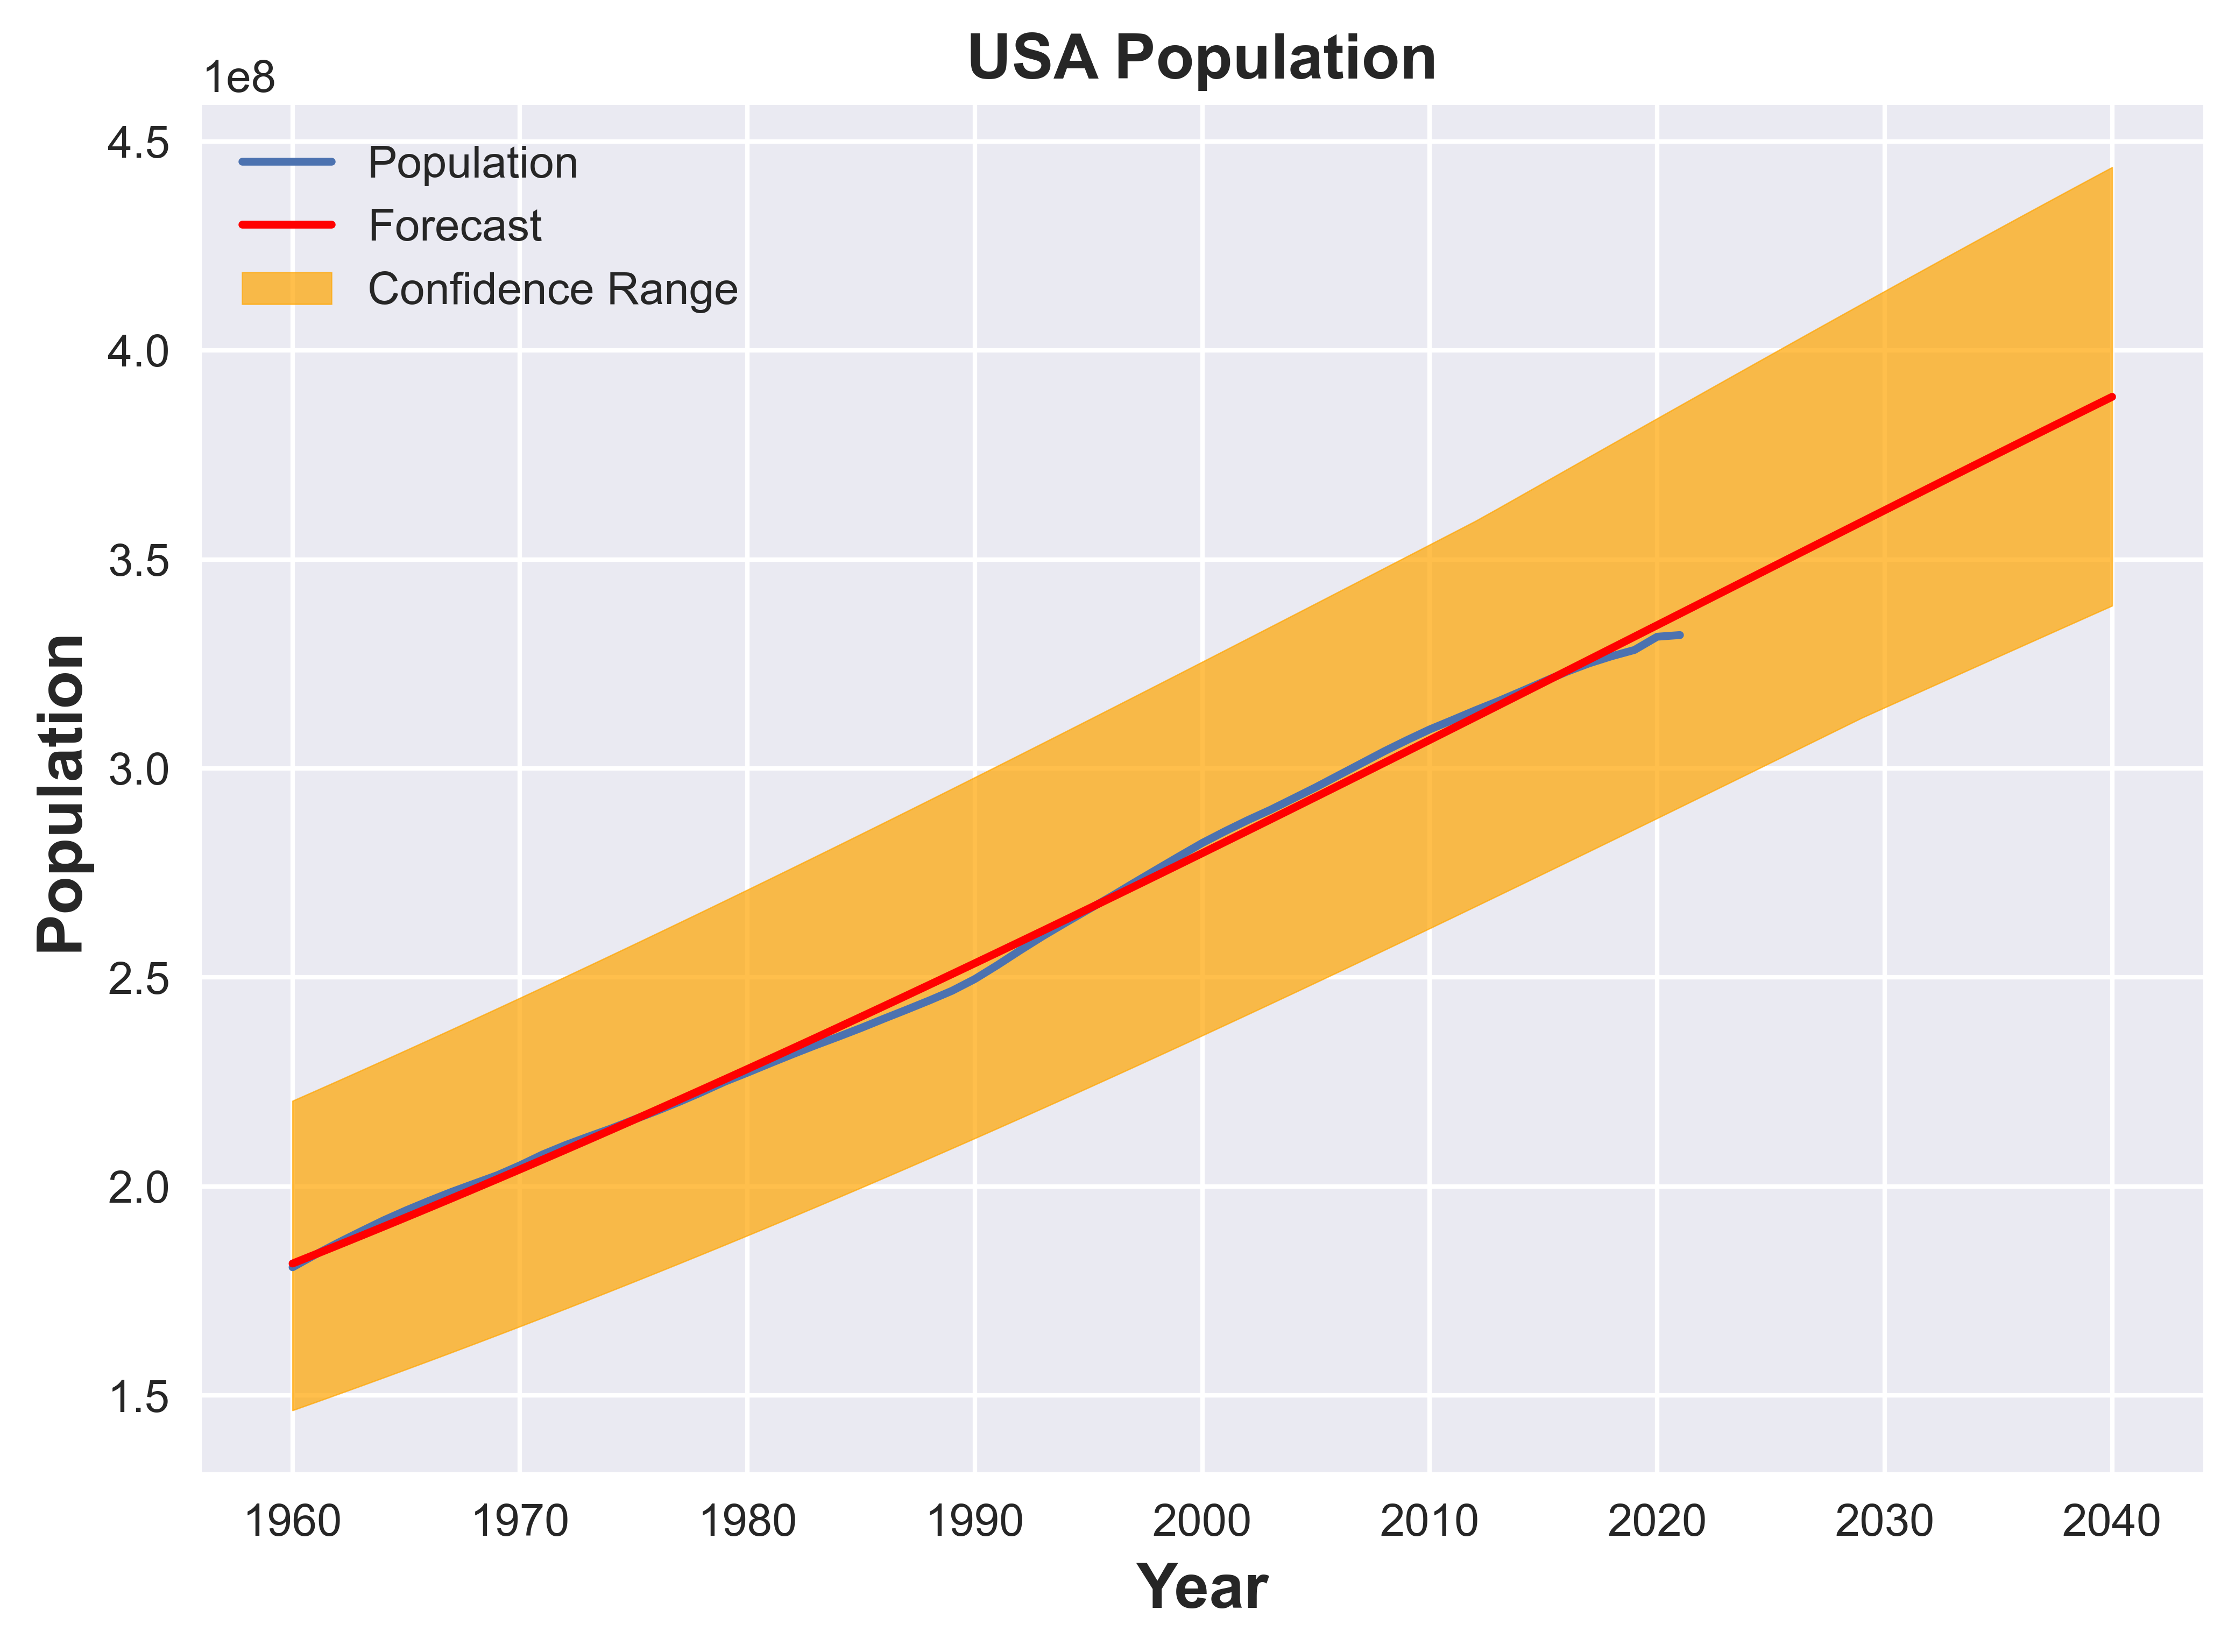

In [25]:

# fitting the United State's Population data
USA= df2[['Year', 'United States']].apply(pd.to_numeric,
                                          errors='coerce')
USA=USA.dropna()

# fits the US logistic data
param_usa, covar_usa = opt.curve_fit(logistic_func, USA['Year'], USA['United States'],
                                   p0=(3e12, 0.03, 2041))

# calculates the standard deviation for United States data
sigma_usa = np.sqrt(np.diag(covar_usa))

# Forecast for the next 20 years
forecast_usa = logistic_func(year, *param_usa)

# calculate error ranges
low_usa, up_usa = err_ranges(year, logistic_func, param_usa, sigma_usa)

# plotting United State's Total Population
plt.style.use('seaborn')
plt.figure(dpi=600)
plt.plot(USA["Year"], USA["United States"],
         label="Population")
plt.plot(year, forecast_usa, label="Forecast", c='red')
plt.fill_between(year, low_usa, up_usa, color="orange",
                 alpha=0.7, label="Confidence Range")
plt.xlabel("Year", fontweight='bold', fontsize=14)
plt.ylabel("Population", fontweight='bold', fontsize=14)
plt.legend(loc='upper left')
plt.title('USA Population', fontweight='bold', fontsize=14)
plt.show()

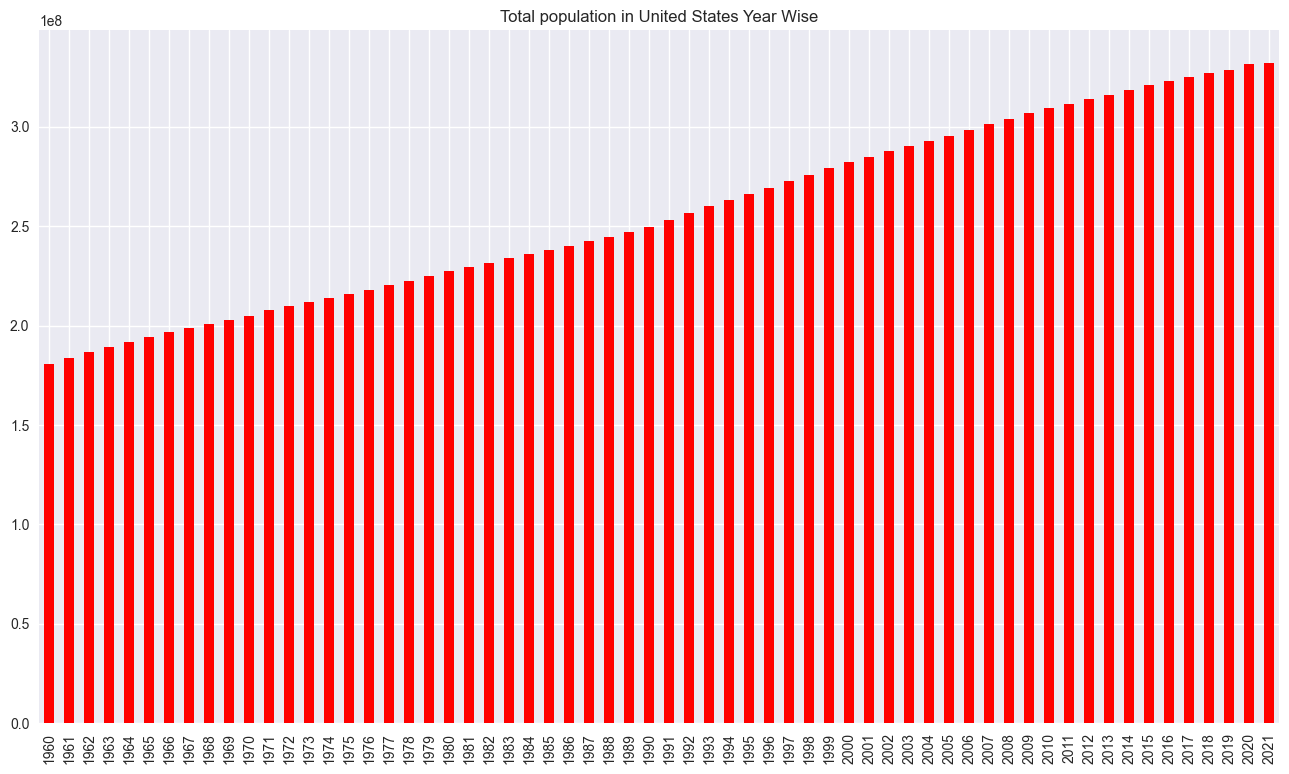

In [26]:
plt.figure(figsize=(16,9))

USA['United States'].plot(
 kind = 'bar' ,
 color = 'red'
 )
plt.title('Total population in United States Year Wise')
plt.show()

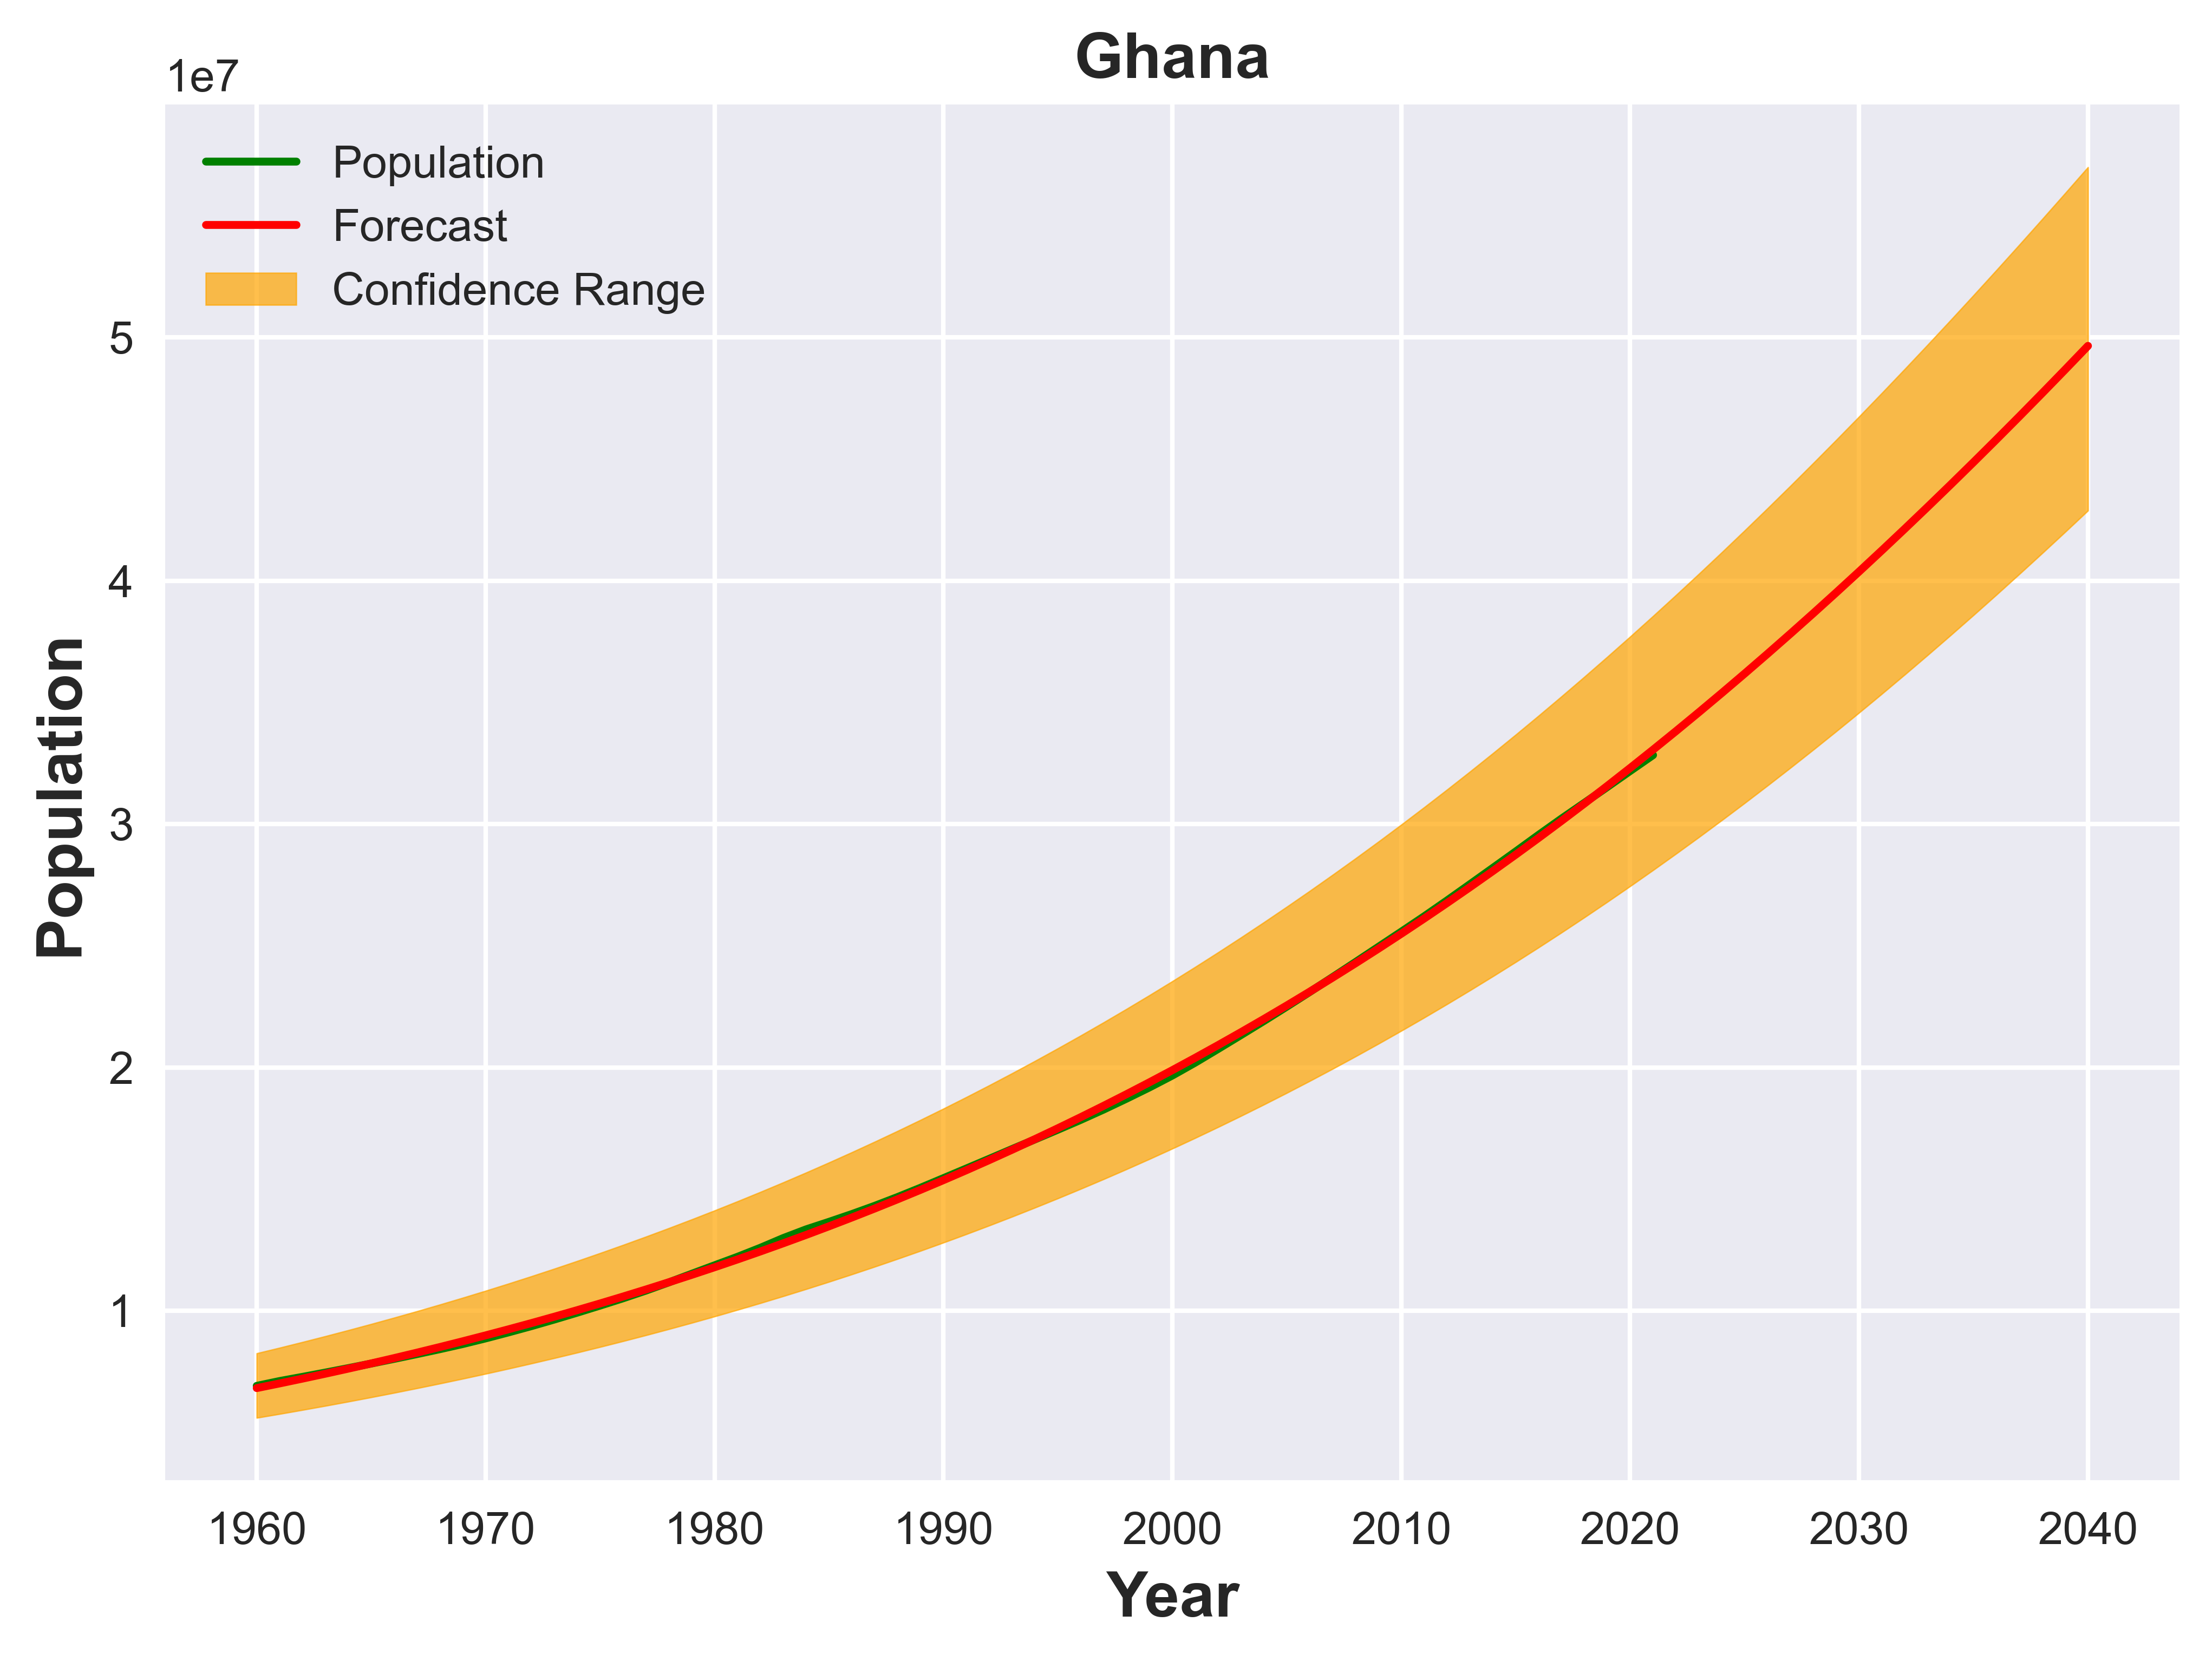

In [27]:

# fitting the data
Ghana = df2[['Year', 'Ghana']].apply(pd.to_numeric,
                                  errors='coerce')
Ghana=Ghana.dropna()

# fits the Ghana's logistic data
param_ghana, covar_ghana = opt.curve_fit(logistic_func, Ghana['Year'], Ghana['Ghana'],
                                   p0=(3e12, 0.03, 2041))

# sigma is the standard deviation
sigma_ghana = np.sqrt(np.diag(covar_ghana))

# Forecast for the next 20 years
forecast_ghana = logistic_func(year, *param_ghana)

# calculate error ranges
low_ghana, up_ghana = err_ranges(year, logistic_func, param_ghana, sigma_ghana)

# creates a new column for the fit data
Ghana['fit'] = logistic_func(Ghana['Year'], *param_ghana)

# plotting Ghana's Total Population
plt.style.use('seaborn')
plt.figure(dpi=600)
plt.plot(Ghana["Year"], Ghana["Ghana"],
         label="Population", c='green')
plt.plot(year, forecast_ghana, label="Forecast", c='red')
plt.fill_between(year, low_ghana, up_ghana, color="orange",
                 alpha=0.7, label='Confidence Range')
plt.xlabel("Year", fontweight='bold', fontsize=14)
plt.ylabel("Population", fontweight='bold', fontsize=14)
plt.legend(loc='upper left')
plt.title('Ghana', fontweight='bold', fontsize=14)
plt.show()


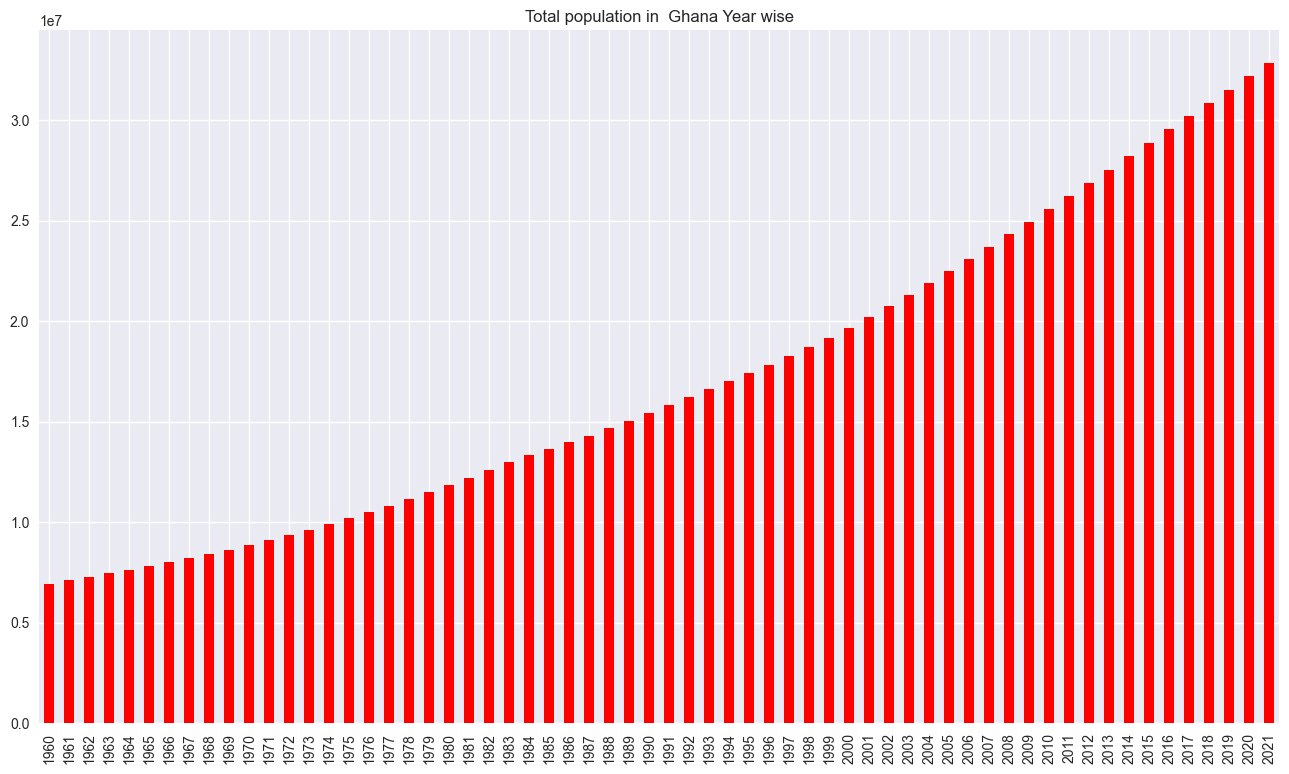

In [28]:
plt.figure(figsize=(16,9))

Ghana['Ghana'].dropna().plot(
 kind = 'bar' ,
 color = 'red'
 )
plt.title('Total population in  Ghana Year wise')
plt.show()

<Figure size 1800x900 with 0 Axes>

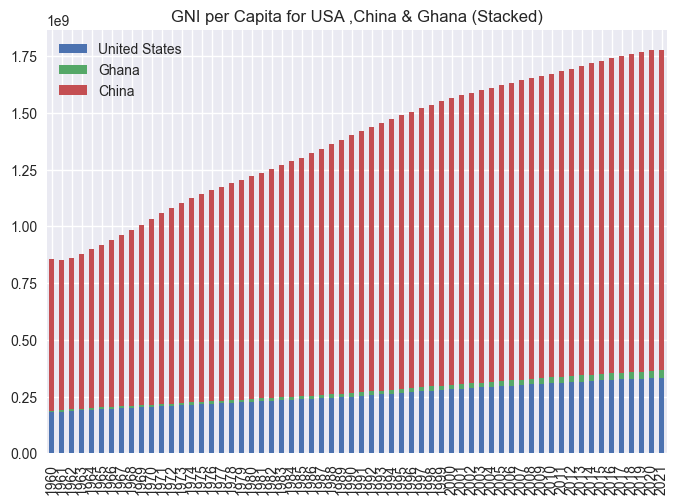

In [29]:
plt.figure(figsize=(18,9))
df_stacked = pd.concat(
 [USA['United States'] , Ghana['Ghana'],df_china['China']] ,
 axis = 1
 )
df_stacked.dropna().plot(
 kind = 'bar' ,
 stacked = True
 )
plt.title('GNI per Capita for USA ,China & Ghana (Stacked)')
plt.show()

In [30]:
#reading the GDP/Capita file from the world bank format
gdp, gdpT = read(file2)


In [31]:

#rename the columns
gdp = gdpT.rename(columns=gdpT.iloc[0])

#drop the country name
gdp = gdp.drop(index=gdp.index[0], axis=0)
gdp['Year'] = gdp.index

#fitting the data
gdp_china = gdp[['Year', 'China']].apply(pd.to_numeric, 
                                               errors='coerce')
gdp_china=gdp_china.dropna()


In [32]:
# poly function for forecasting GDP/Capita
def poly(x, a, b, c):
    """ Calculates the value of a polynomial function of the form ax^2 + bx + c.
    
    Parameters:
        x: The input value for the polynomial function.
        a: The coefficient of x^2 in the polynomial.
        b: The coefficient of x in the polynomial.
        c: The constant term in the polynomial.
        
    Returns:
           The value of the polynomial function at x.
      
    """
    return a*x**2 + b*x + c

def get_error_estimates(x, y, degree):
    
    """
   Calculates the error estimates of a polynomial function.
   
   Parameters:
       x : The x-values of the data points.
       y : The y-values of the data points.
       degree: The degree of the polynomial.
       
   Returns:
       The standard deviation of the residuals as the error estimate.
       """
      
    coefficients = np.polyfit(x, y, degree)
    y_estimate = np.polyval(coefficients, x)
    residuals = y - y_estimate
#  The standard deviation of the residuals as the error estimate
    return np.std(residuals)

#fits the linear data
param_china, cov_china = opt.curve_fit(poly, gdp_china['Year'], gdp_china['China'] )


 Error Estimates for China GDP/Capita:
 2.5447942091076308


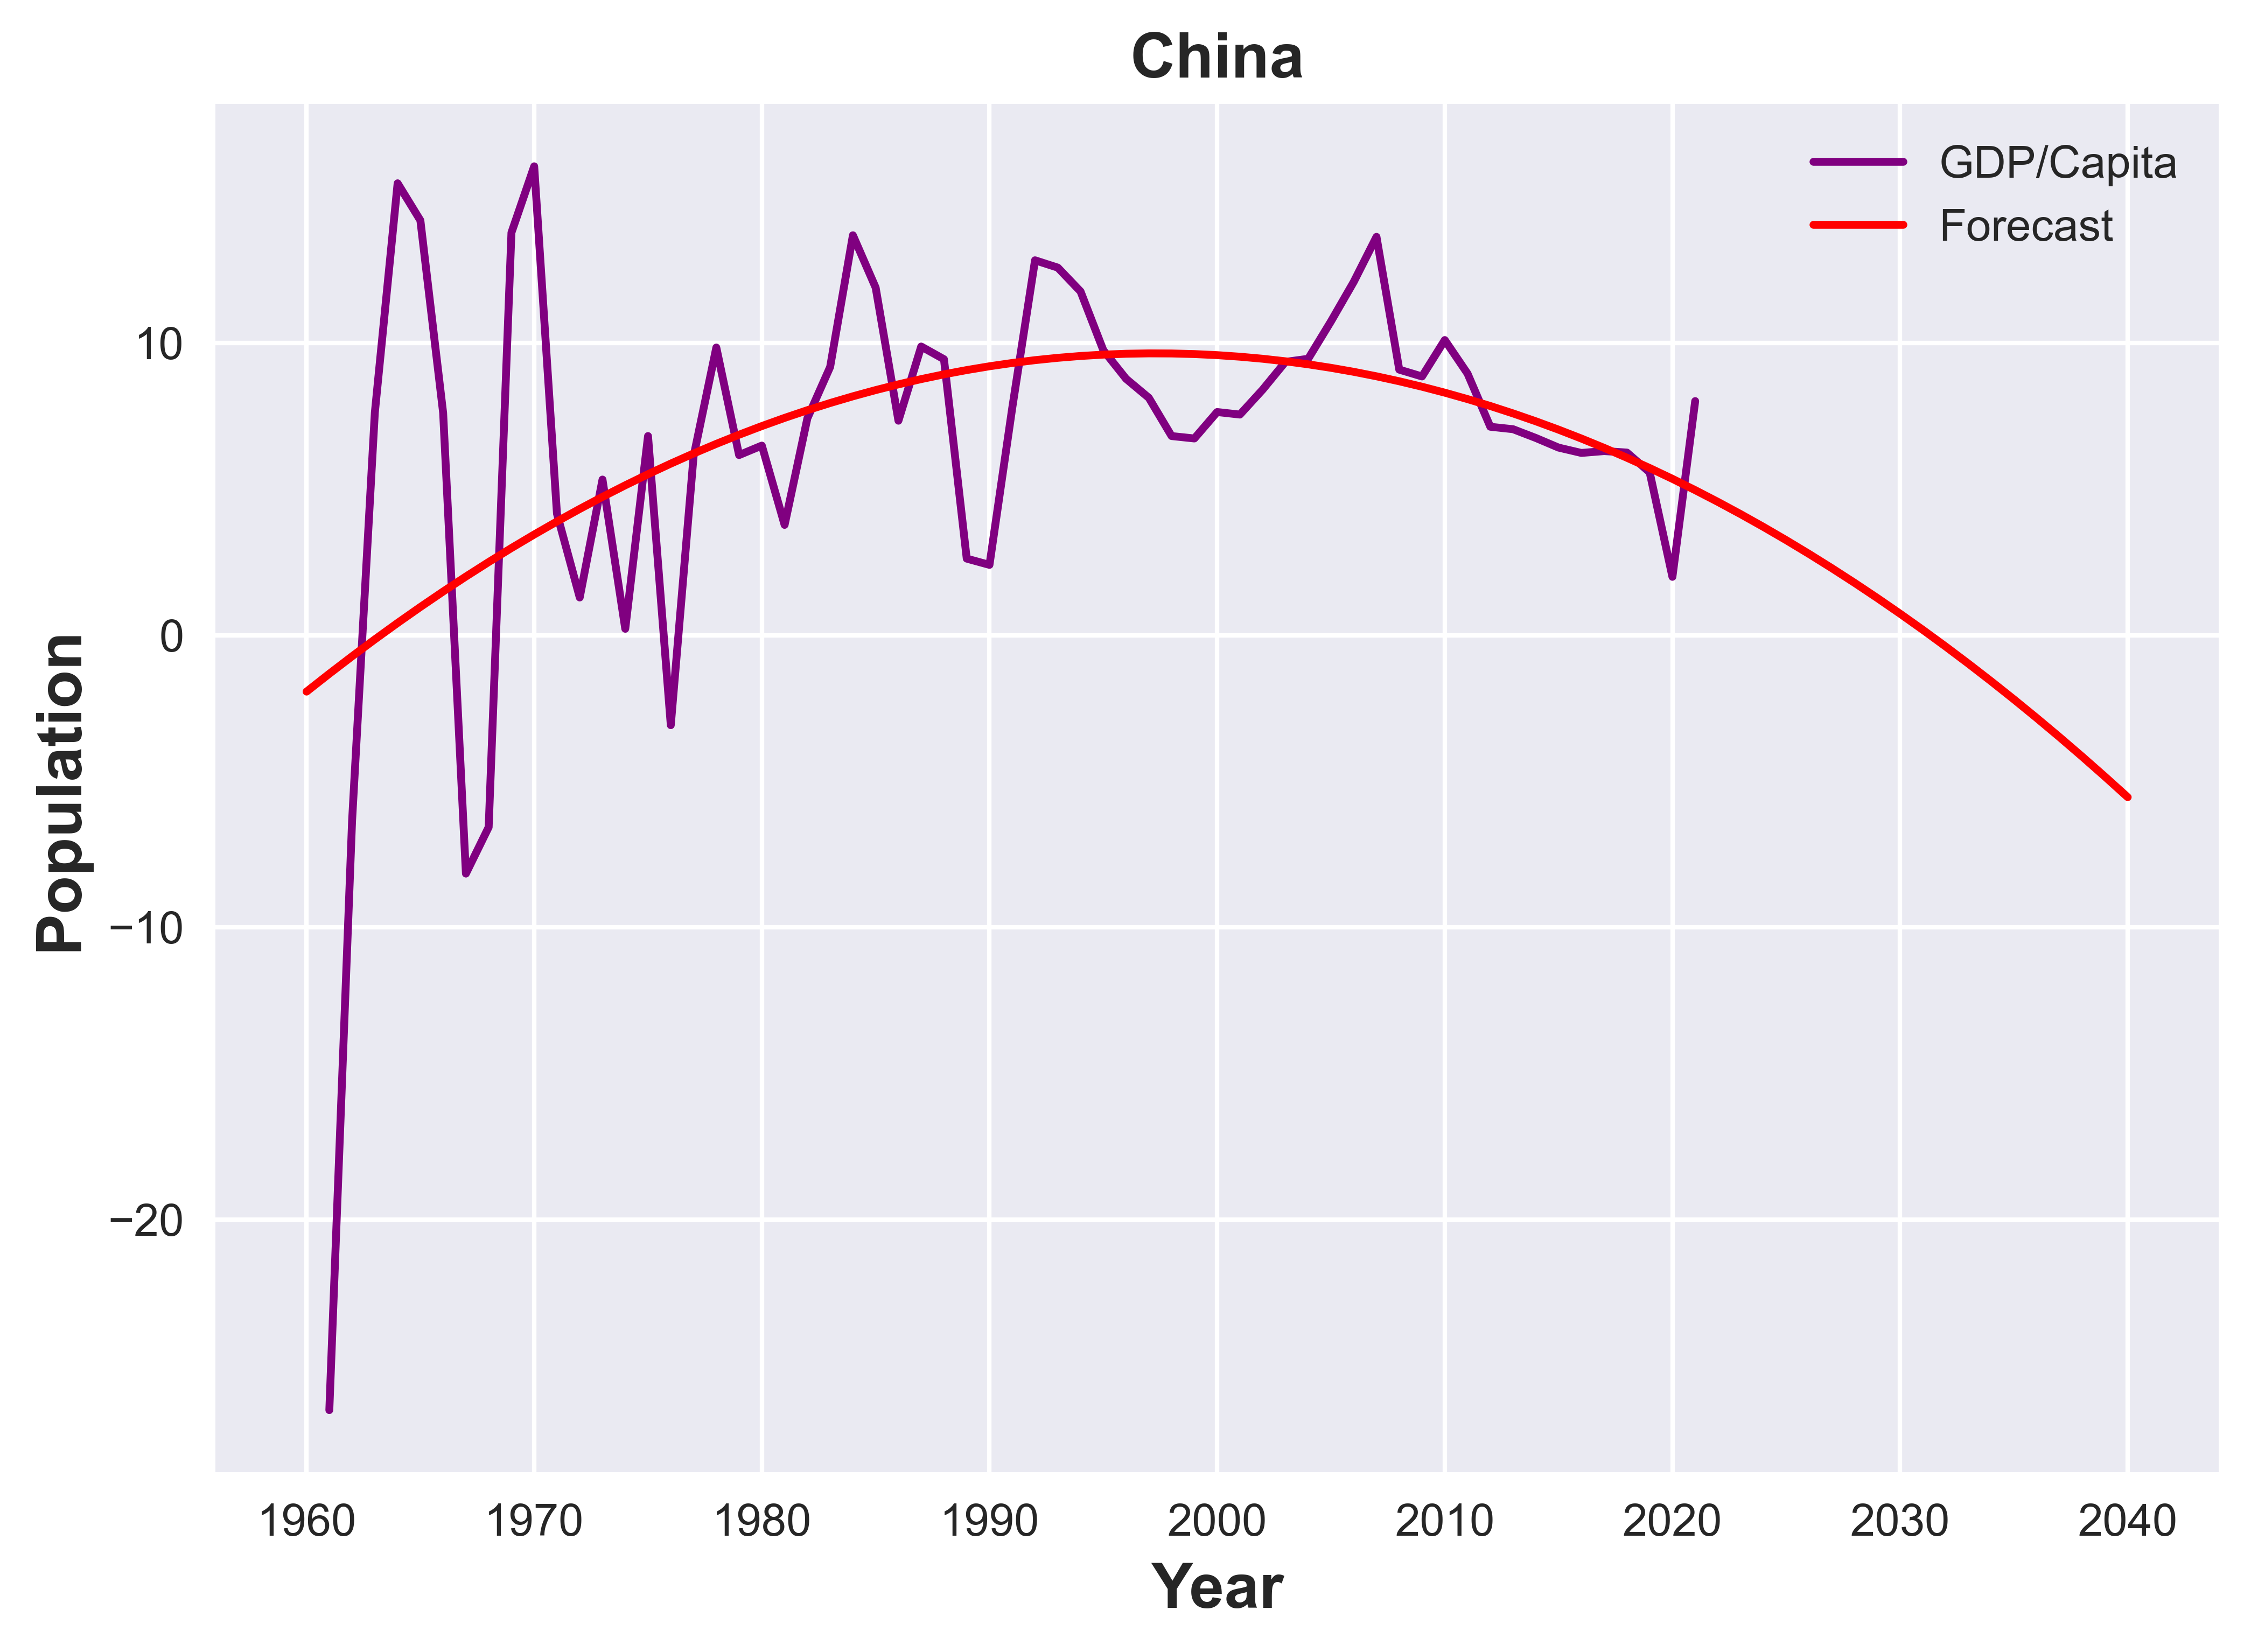

In [33]:

#calculates the standard deviation
sigma_china = np.sqrt(np.diag(cov_china))

#creates a new column for the fit figures
gdp_china['fit'] = poly(gdp_china['Year'], *param_china)

#forecasting the fit figures
forecast_china = poly(year, *param_china)

#error estimates
error_china= get_error_estimates(gdp_china['China'], gdp_china['fit'], 2)
print('\n Error Estimates for China GDP/Capita:\n', error_china)

#Plotting
plt.style.use('seaborn')
plt.figure(dpi=600)
plt.plot(gdp_china["Year"], gdp_china["China"], 
         label="GDP/Capita", c='purple')
plt.plot(year, forecast_china, label="Forecast", c='red')

plt.xlabel("Year", fontweight='bold',fontsize=14)
plt.ylabel("Population", fontweight='bold', fontsize=14)
plt.legend()
plt.title('China', fontweight='bold', fontsize=14)
plt.show()




 Error Estimates for US GDP/Capita:
 0.5138541631066775


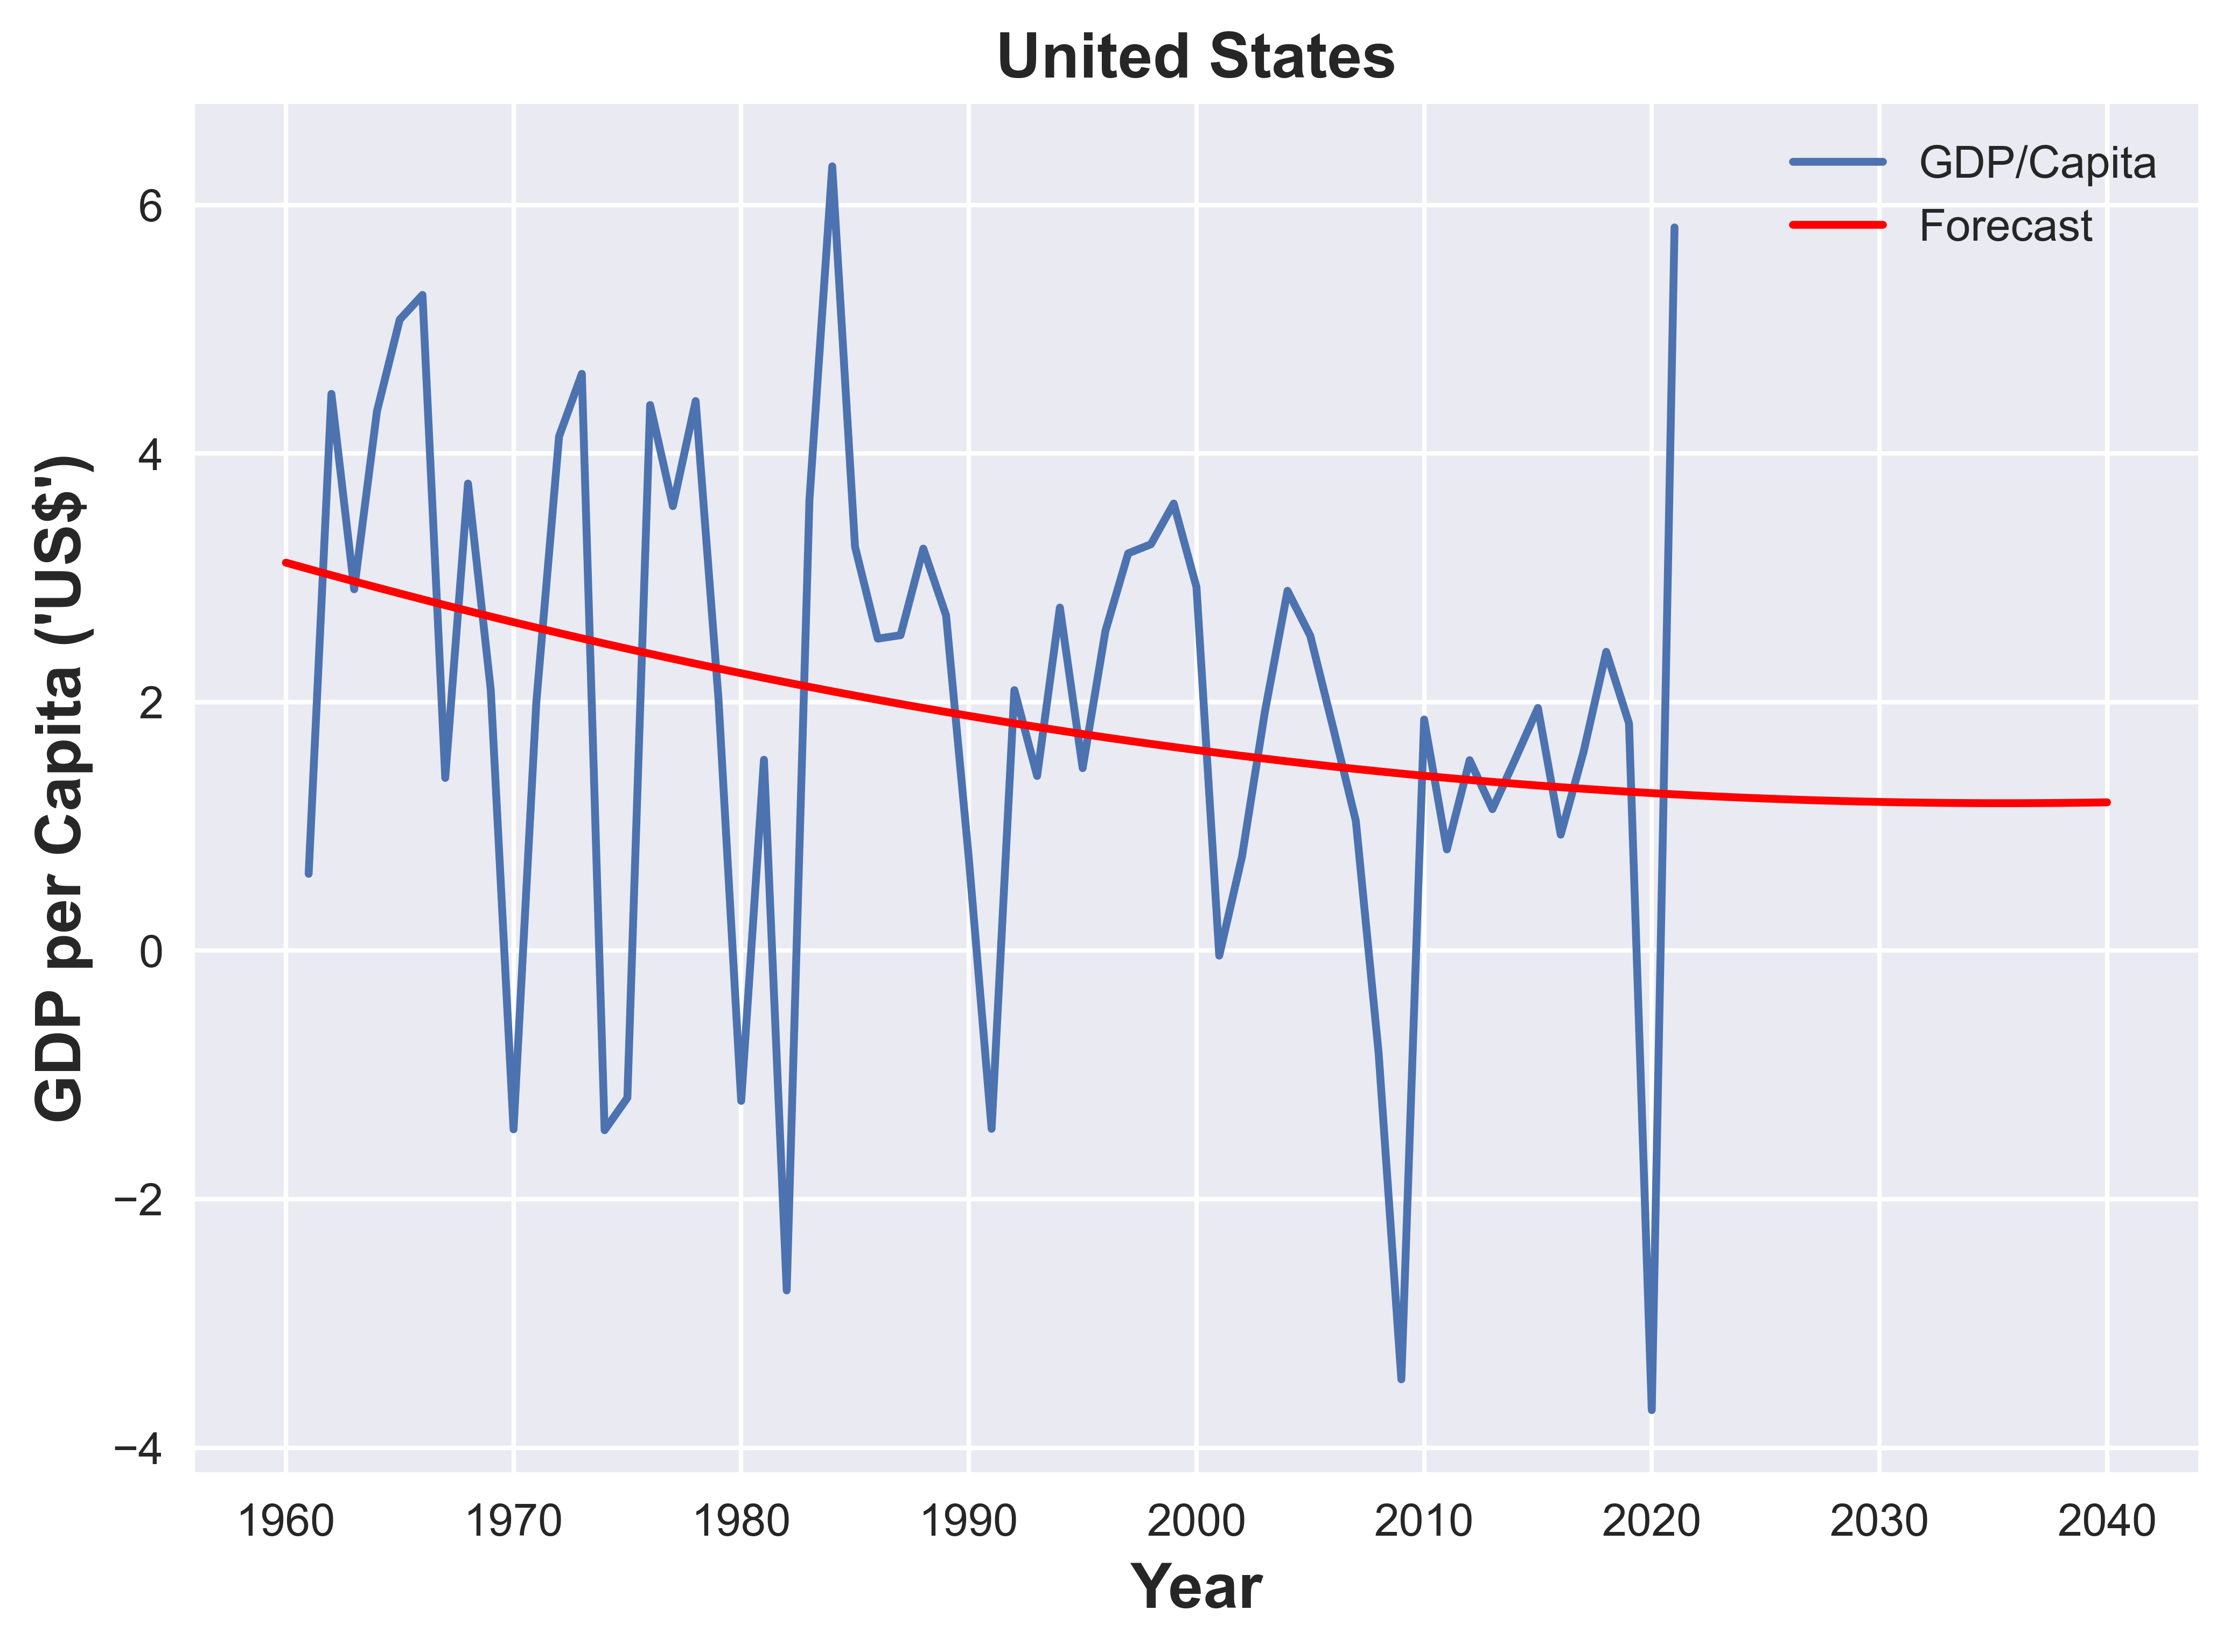

In [34]:

#fitting the data
gdp_usa = gdp[['Year', 'United States']].apply(pd.to_numeric, 
                                           errors='coerce')
gdp_usa =gdp_usa.dropna()
#fits the linear data
param_usa, cov_usa = opt.curve_fit(poly, gdp_usa['Year'], gdp_usa['United States'])

#calculates the standard deviation
sigma_usa = np.sqrt(np.diag(cov_usa))

#creates a column for the fit data
gdp_usa['fit'] = poly(gdp_usa['Year'], *param_usa)

#forecasting for the next 20 years
forecast_usa = poly(year, *param_usa)

#error estimates
error_usa = get_error_estimates(gdp_usa['United States'], gdp_usa['fit'], 2)
print('\n Error Estimates for US GDP/Capita:\n', error_usa)

#plotting
plt.style.use('seaborn')
plt.figure(dpi=600)
plt.plot(gdp_usa["Year"], gdp_usa["United States"], 
         label="GDP/Capita")
plt.plot(year, forecast_usa, label="Forecast", c='red')
plt.xlabel("Year", fontweight='bold', fontsize=14)
plt.ylabel("GDP per Capita ('US$')", fontweight='bold', fontsize=14)
plt.legend()
plt.title('United States', fontweight='bold', fontsize=14)
plt.show()



 Error Estimates for Ghana GDP/Capita:
 1.5789797022445797


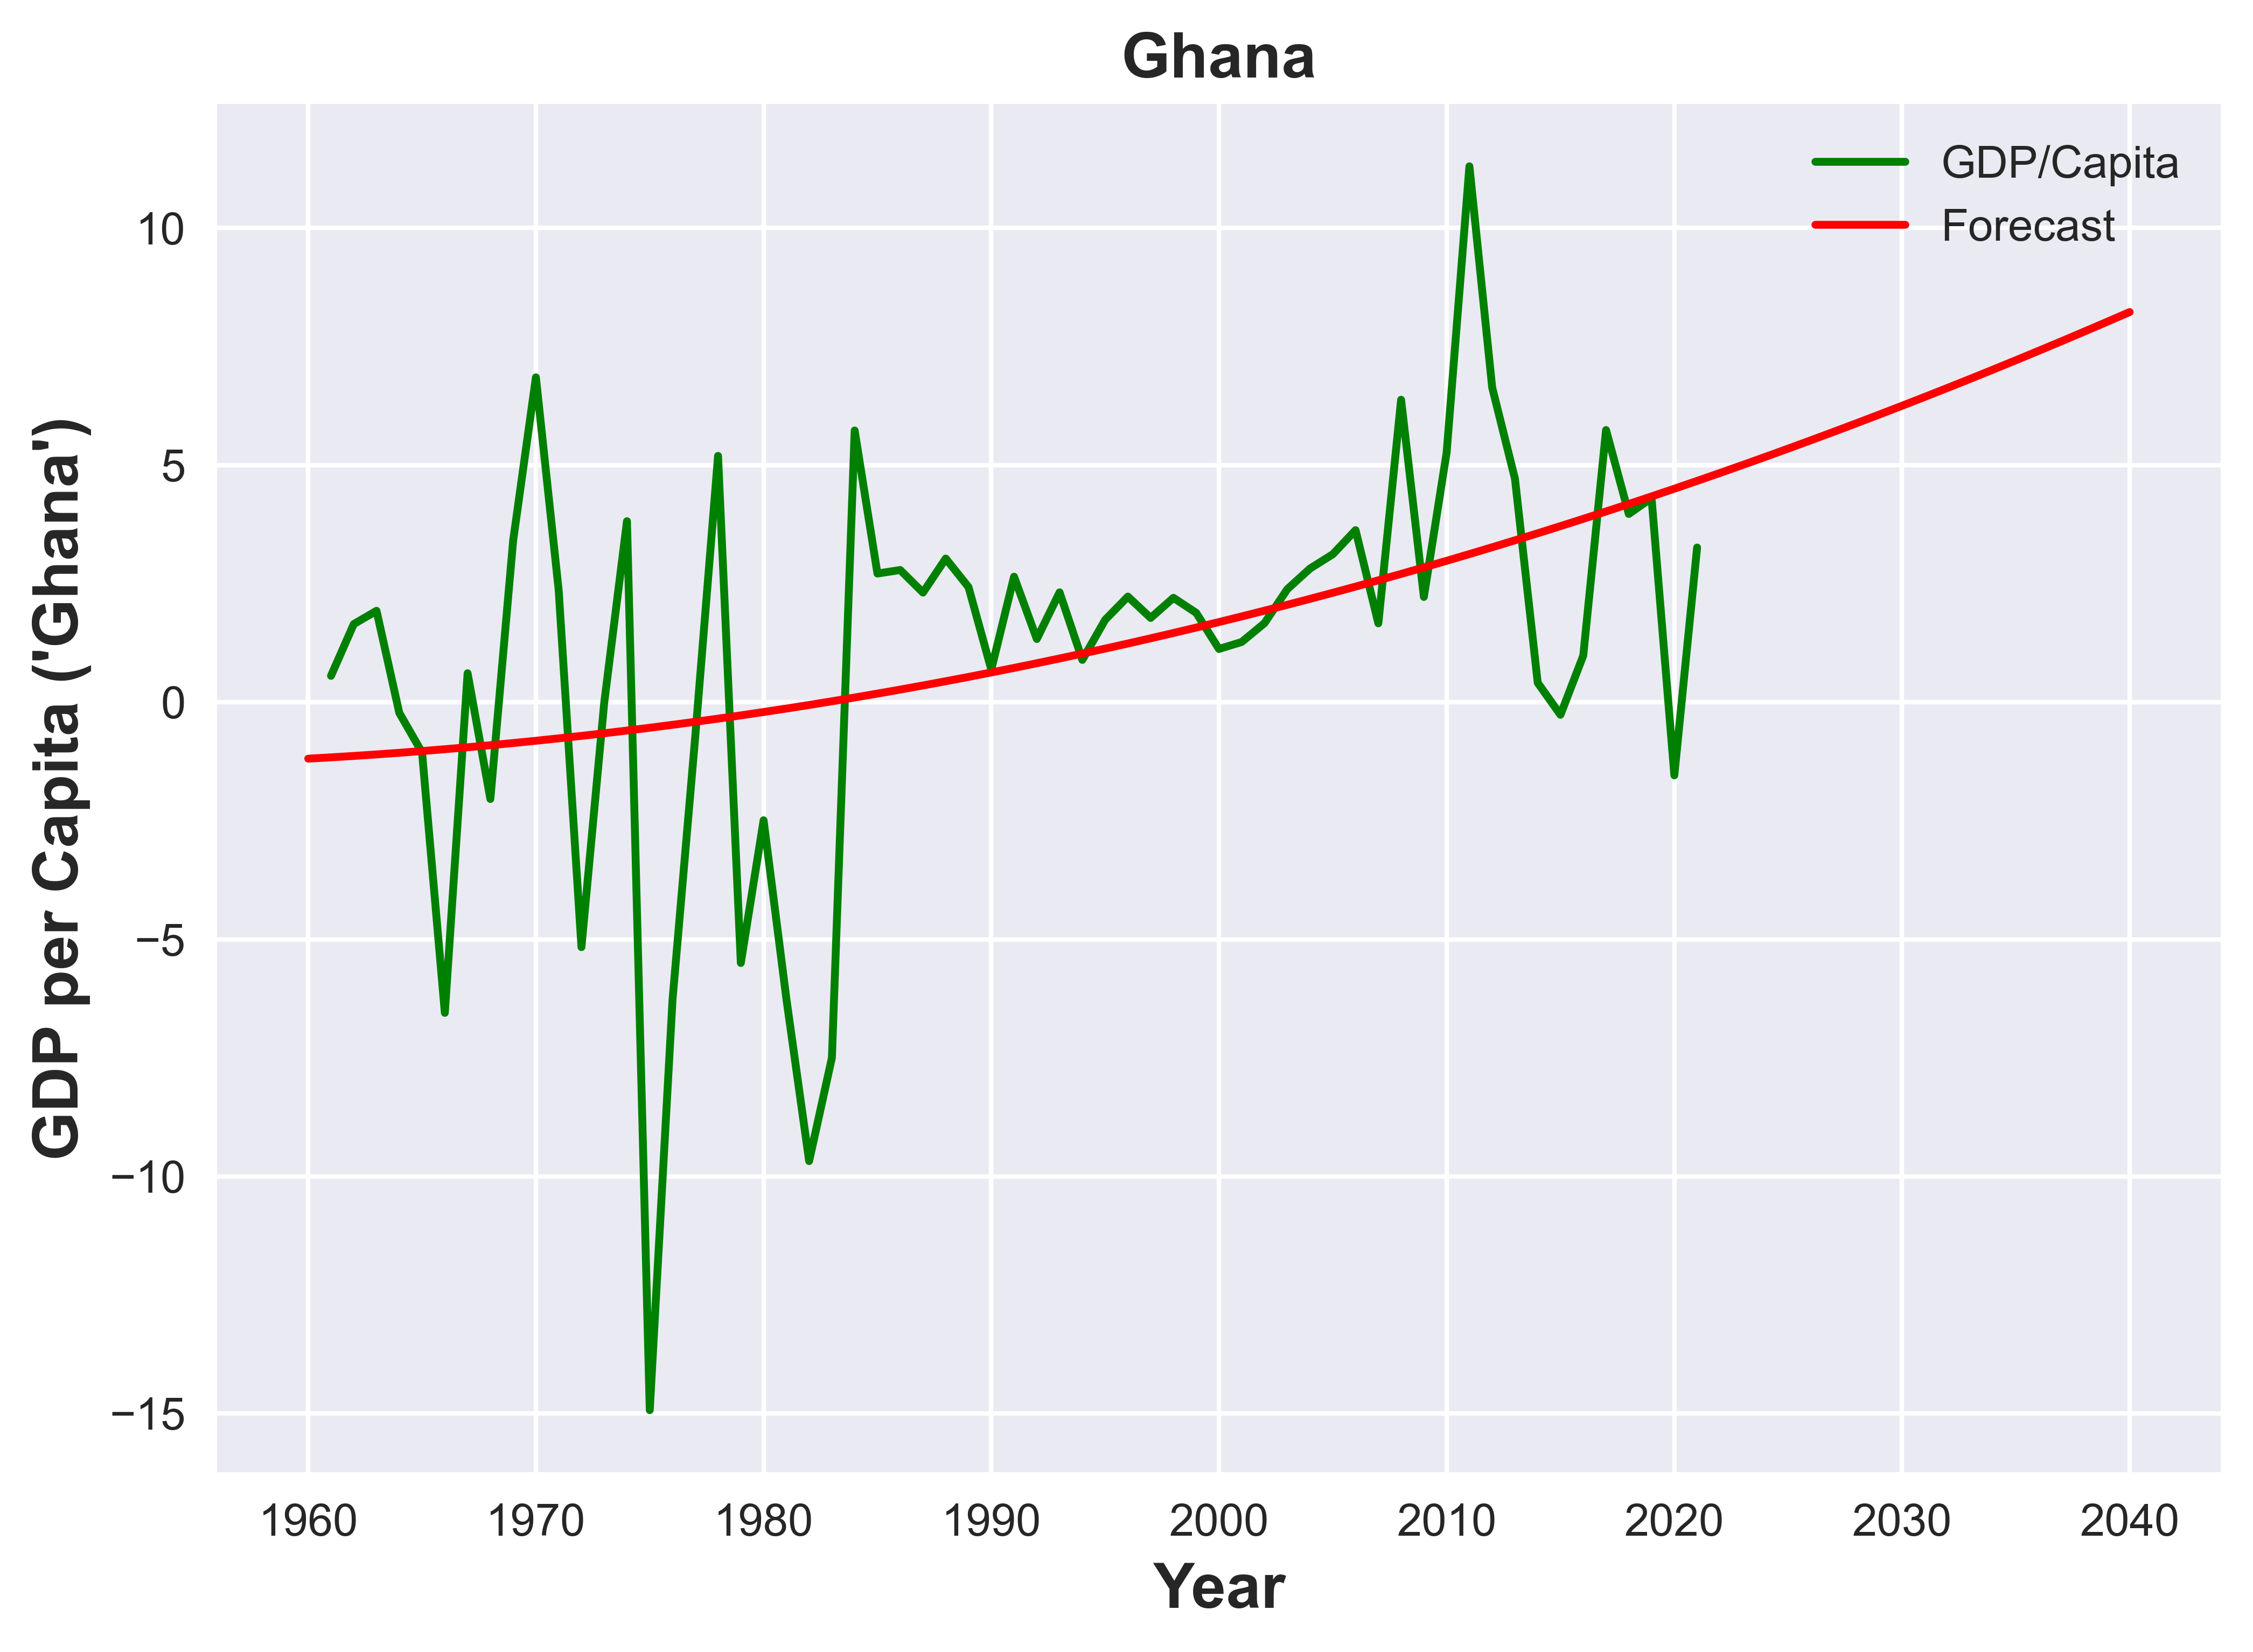

In [35]:

#fitting the data
gdp_gh = gdp[['Year', 'Ghana']].apply(pd.to_numeric, 
                                               errors='coerce')
gdp_gh=gdp_gh.dropna()
#fits the linear data
param_gh, cov_gh = opt.curve_fit(poly, gdp_gh['Year'], gdp_gh['Ghana'])

#calculates the standard deviation
sigma_gh = np.sqrt(np.diag(cov_gh))

#creates a new column for the fit data
gdp_gh['fit'] = poly(gdp_gh['Year'], *param_gh)

#forescast paramaters for the next 20 years
forecast_gh = poly(year, *param_gh)

#error estimates
error_ghana = get_error_estimates(gdp_gh['Ghana'], gdp_gh['fit'], 2)
print('\n Error Estimates for Ghana GDP/Capita:\n', error_ghana)

#plotting
plt.style.use('seaborn')
plt.figure(dpi=600)
plt.plot(gdp_gh["Year"], gdp_gh["Ghana"], 
         label="GDP/Capita", c='green')
plt.plot(year, forecast_gh, label="Forecast", c='red')
plt.xlabel("Year", fontweight='bold', fontsize=14)
plt.ylabel("GDP per Capita ('Ghana')", fontweight='bold', fontsize=14)
plt.legend()
plt.title('Ghana', fontweight='bold',fontsize=14)
plt.show()
